In [469]:
import pandas as pd
import numpy as np
import pacmap
from umap import UMAP
from sklearn.decomposition import PCA

import plotly.express as px

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages

## Logistic regression, >=85% accurate NUPs 
- view top features
- cluster patients upon top features
  -  by clinical characteristics?

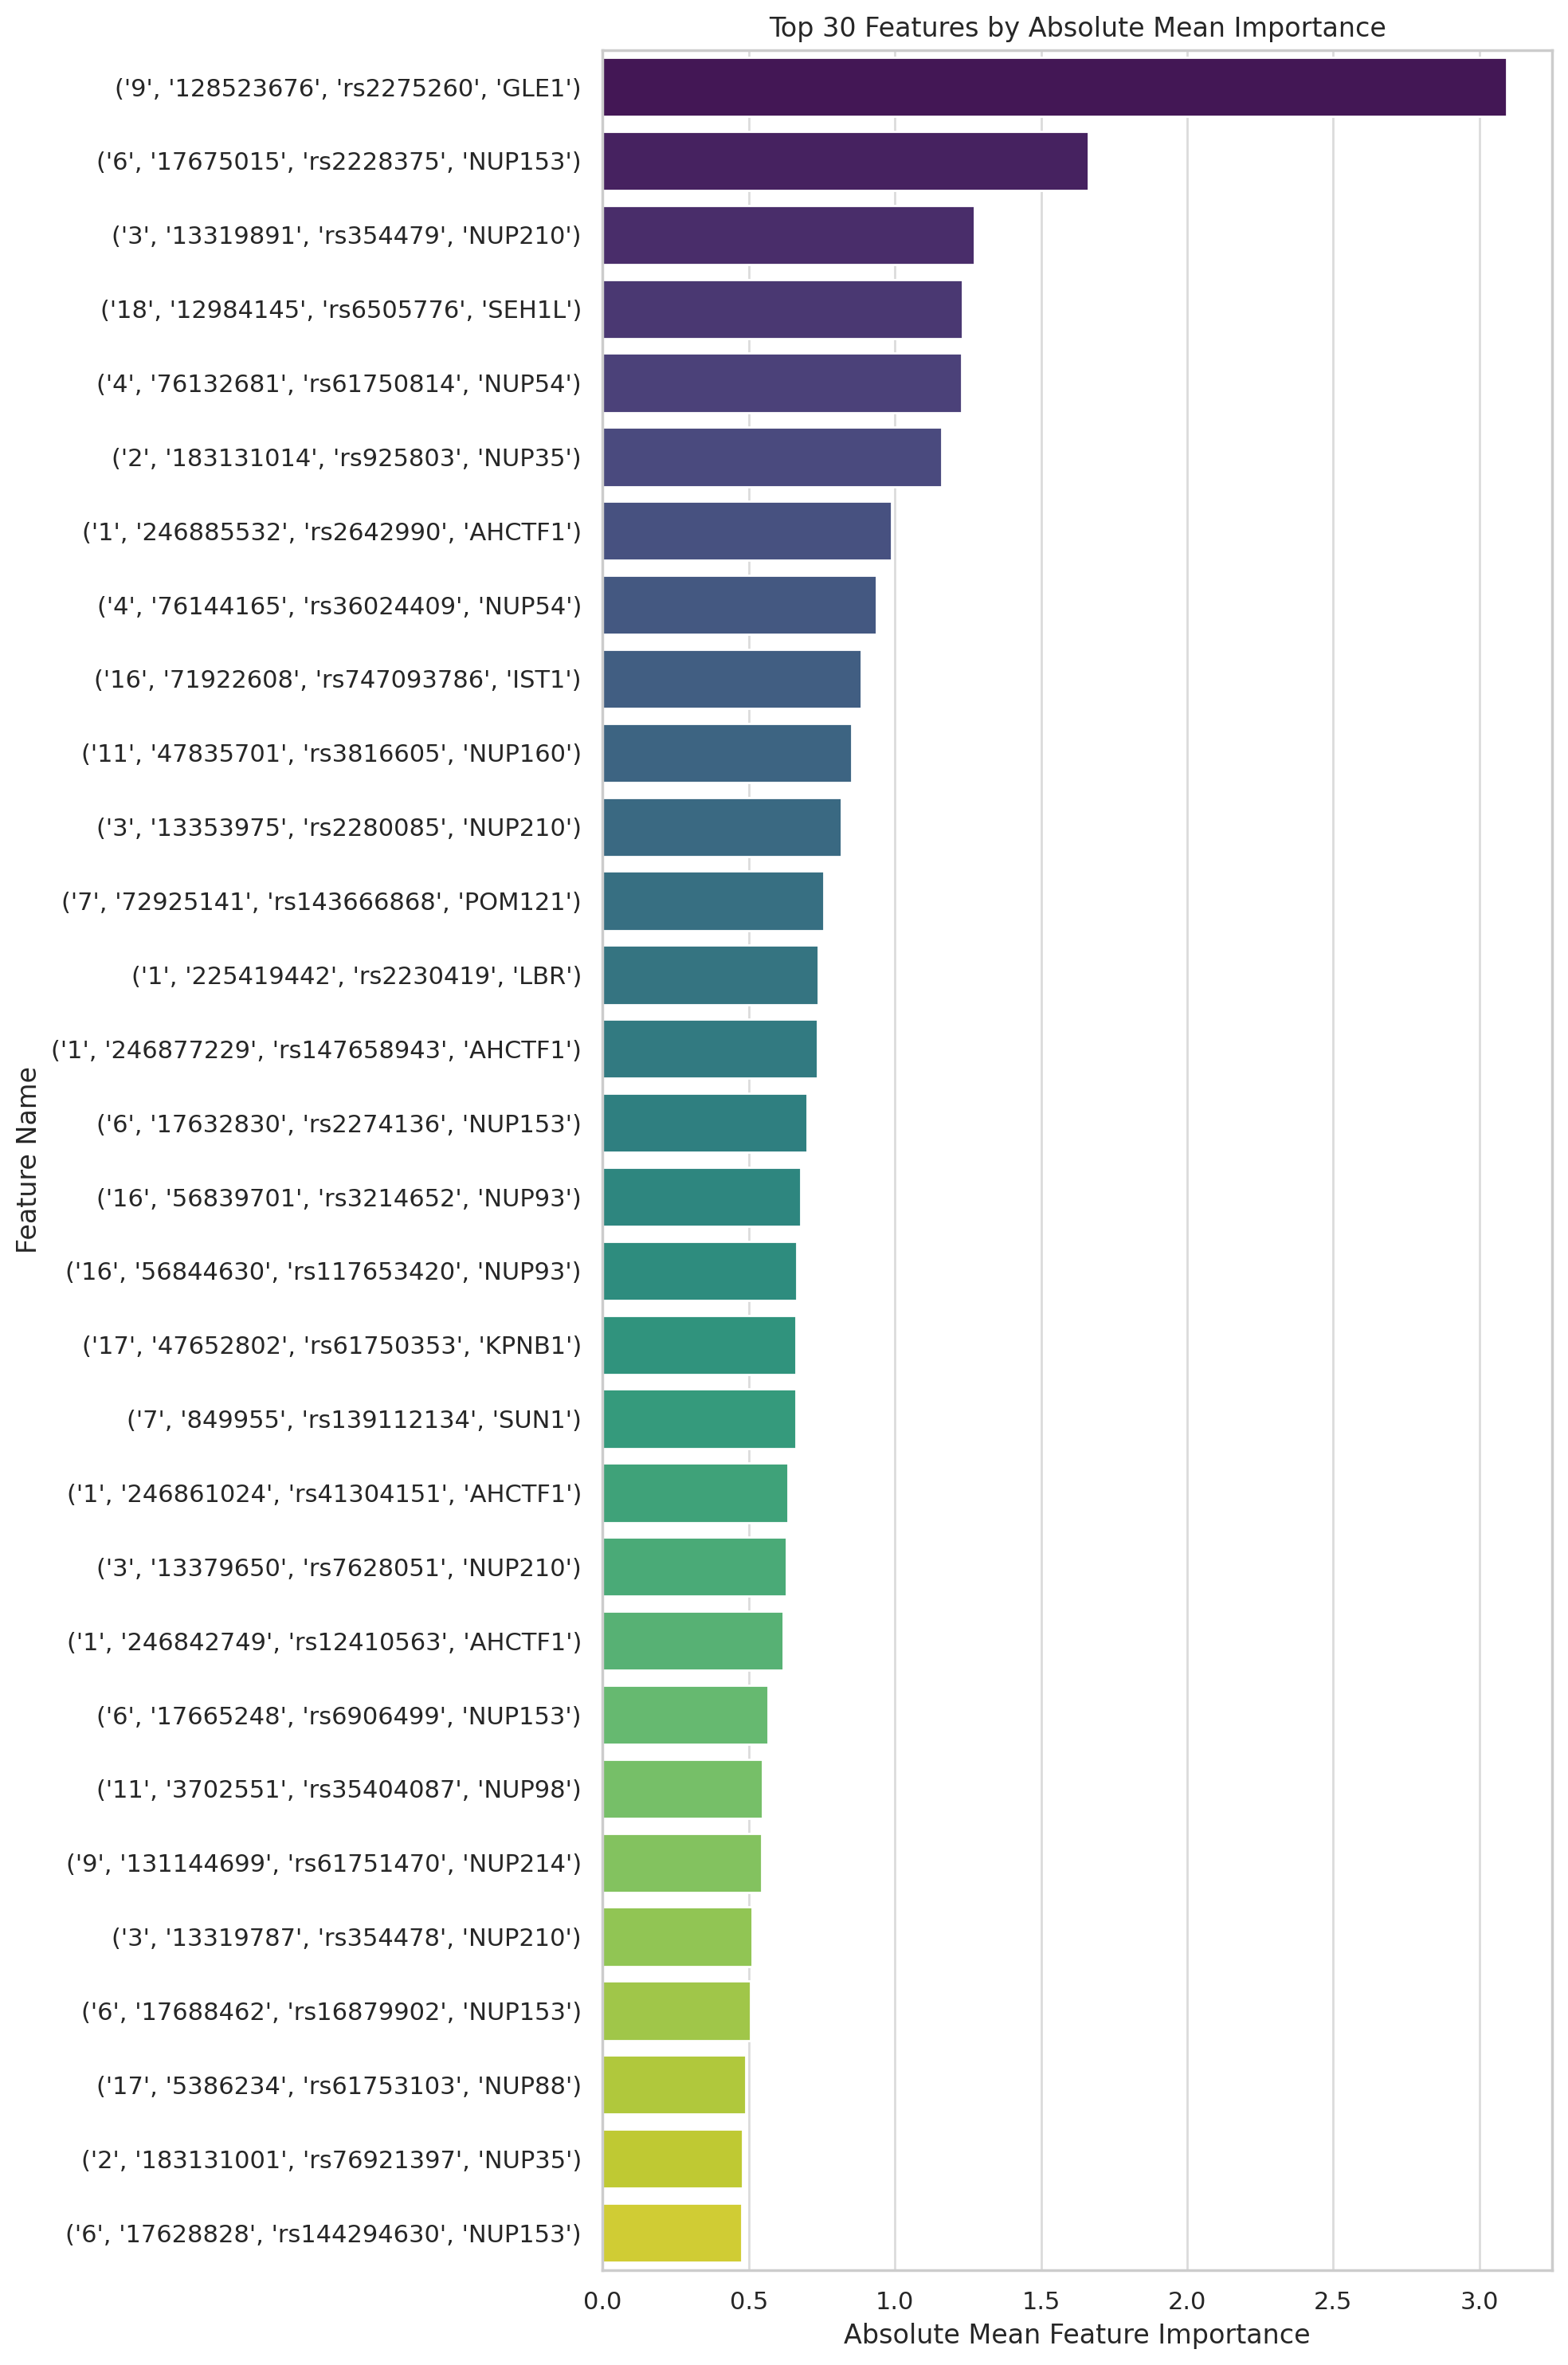

In [2]:
featureCoefficients = pd.read_csv('projects/NUPs60-wellClassified-rsID-rareBinned-0.005MAF/LogisticRegression/globalFeatures_LogisticRegression_NUPs60-wellClassified-rsID-rareBinned-0.005MAF.csv')

In [ ]:
featureCoefficients['feature_name'].to_list()

In [503]:
# convert feature importances to absolute values
featureCoefficients['mean_feature_importances'] = featureCoefficients['mean_feature_importances'].abs()
featureCoefficients = featureCoefficients.sort_values(by='mean_feature_importances', ascending=False)

# top 10 important features
topVariantIndex = pd.MultiIndex.from_tuples([eval(x) for x in featureCoefficients['feature_name'].iloc[:30]], names=['chrom', 'position', 'rsID', 'gene'])

In [329]:
topVariantIndex

MultiIndex([( '9', '128523676',   'rs2275260',   'GLE1'),
            ( '6',  '17675015',   'rs2228375', 'NUP153'),
            ( '3',  '13319891',    'rs354479', 'NUP210'),
            ('18',  '12984145',   'rs6505776',  'SEH1L'),
            ( '4',  '76132681',  'rs61750814',  'NUP54'),
            ( '2', '183131014',    'rs925803',  'NUP35'),
            ( '1', '246885532',   'rs2642990', 'AHCTF1'),
            ( '4',  '76144165',  'rs36024409',  'NUP54'),
            ('16',  '71922608', 'rs747093786',   'IST1'),
            ('11',  '47835701',   'rs3816605', 'NUP160'),
            ( '3',  '13353975',   'rs2280085', 'NUP210'),
            ( '7',  '72925141', 'rs143666868', 'POM121'),
            ( '1', '225419442',   'rs2230419',    'LBR'),
            ( '1', '246877229', 'rs147658943', 'AHCTF1'),
            ( '6',  '17632830',   'rs2274136', 'NUP153'),
            ('16',  '56839701',   'rs3214652',  'NUP93'),
            ('16',  '56844630', 'rs117653420',  'NUP93'),
            ('

### Initialize genotype embeddings

In [318]:
from tasks.input import processInputFiles
from config import config
(
    genotypeData,
    freqReferenceGenotypeData,
    clinicalData,
) = processInputFiles(config)
clinicalData.set_index('ExternalSubjectId', inplace=True)
clinicalData = clinicalData[~clinicalData.index.duplicated(keep="first")]

20:41:02.583 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


20:41:02.935 | INFO    | prefect.engine - Created flow run 'onyx-bloodhound' for flow 'processInputFiles'

20:41:02.936 | WARNING | Flow run 'onyx-bloodhound' - Task runner 'RayTaskRunner' does not implement the `duplicate` method and will fail if used for concurrent execution of the same flow.

20:41:02.937 | INFO    | prefect.task_runner.ray - Creating a local Ray instance

2024-02-20 20:41:02,938	WARNING worker.py:1395 -- SIGTERM handler is not set because current thread is not the main thread.
2024-02-20 20:41:06,999	INFO worker.py:1724 -- Started a local Ray instance.


20:41:07.627 | INFO    | prefect.task_runner.ray - Using Ray cluster with 1 nodes.

20:41:07.699 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:41:07.735 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'load-0' for task 'load'

20:41:07.736 | INFO    | Flow run 'onyx-bloodhound' - Executing 'load-0' immediately...

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



20:42:12.955 | INFO    | Task run 'load-0' - Finished in state Completed()

20:42:12.956 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:42:12.972 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'filterTable-0' for task 'filterTable'

20:42:12.973 | INFO    | Flow run 'onyx-bloodhound' - Executing 'filterTable-0' immediately...

20:42:13.070 | INFO    | Task run 'filterTable-0' - Filtering: pct_european>=0.85

20:42:13.131 | INFO    | Task run 'filterTable-0' - Finished in state Completed()

20:42:13.133 | INFO    | Flow run 'onyx-bloodhound' - filtered 597 samples from clinical data

20:42:13.134 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:42:13.152 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'filterTable-1' for task 'filterTable'

20:42:13.153 | INFO    | Flow run 'onyx-bloodhound' - Executing 'filterTable-1' immediately...

20:42:13.197 | INFO    | Task run 'filterTable-1' - Finished in state Completed()

20:42:13.198 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:42:13.210 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'filterTable-2' for task 'filterTable'

20:42:13.212 | INFO    | Flow run 'onyx-bloodhound' - Executing 'filterTable-2' immediately...

20:42:13.248 | INFO    | Task run 'filterTable-2' - Filtering: `Superpopulation code`=='EUR'

20:42:13.271 | INFO    | Task run 'filterTable-2' - Finished in state Completed()

20:42:13.273 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:42:13.289 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'filterTable-3' for task 'filterTable'

20:42:13.289 | INFO    | Flow run 'onyx-bloodhound' - Executing 'filterTable-3' immediately...

20:42:13.313 | INFO    | Task run 'filterTable-3' - Filtering: `Subject Group`=='ALS Spectrum MND' & `pct_european`<0.85

20:42:13.335 | INFO    | Task run 'filterTable-3' - Finished in state Completed()

20:42:13.336 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:42:13.349 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'filterTable-4' for task 'filterTable'

20:42:13.350 | INFO    | Flow run 'onyx-bloodhound' - Executing 'filterTable-4' immediately...

20:42:13.373 | INFO    | Task run 'filterTable-4' - Filtering: `Subject Group`=='Non-Neurological Control' & `pct_european`<0.85

20:42:13.394 | INFO    | Task run 'filterTable-4' - Finished in state Completed()

20:42:13.395 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:42:13.408 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'filterTable-5' for task 'filterTable'

20:42:13.409 | INFO    | Flow run 'onyx-bloodhound' - Executing 'filterTable-5' immediately...

20:42:13.433 | INFO    | Task run 'filterTable-5' - Filtering: `Superpopulation code`!='EUR'

20:42:13.452 | INFO    | Task run 'filterTable-5' - Finished in state Completed()

20:42:13.453 | INFO    | Flow run 'onyx-bloodhound' - filtered 0 samples from external data ../adhoc analysis/>=85%accurateCases_LogisticRegression_NUPs60-rsID-rareBinned-0.005MAF.tsv

20:42:13.454 | INFO    | Flow run 'onyx-bloodhound' - filtered 4309 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

20:42:13.455 | INFO    | Flow run 'onyx-bloodhound' - filtered 4158 samples from external data ../adhoc analysis/ACWM_ethnicallyVariable.tsv

20:42:13.456 | INFO    | Flow run 'onyx-bloodhound' - filtered 4426 samples from external data ../adhoc analysis/ACWM_ethnicallyVariable.tsv

20:42:13.457 | INFO    | Flow run 'onyx-bloodhound' - filtered 669 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

20:42:13.458 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:42:13.471 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'filterTable-6' for task 'filterTable'

20:42:13.472 | INFO    | Flow run 'onyx-bloodhound' - Executing 'filterTable-6' immediately...

20:42:13.509 | INFO    | Task run 'filterTable-6' - Finished in state Completed()

20:42:13.511 | INFO    | Flow run 'onyx-bloodhound' - filtered 0 variants from VCF

20:42:13.525 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:42:13.540 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'integrateExternalSampleIDs-0' for task 'integrateExternalSampleIDs'

20:42:13.540 | INFO    | Flow run 'onyx-bloodhound' - Executing 'integrateExternalSampleIDs-0' immediately...

20:42:13.582 | INFO    | Task run 'integrateExternalSampleIDs-0' - Finished in state Completed()

20:42:13.671 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


20:42:13.755 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'applyAlleleModel-0' for task 'applyAlleleModel'

20:42:13.938 | INFO    | Flow run 'onyx-bloodhound' - Submitted task run 'applyAlleleModel-0' for execution.

20:42:14.057 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'applyAlleleModel-1' for task 'applyAlleleModel'

20:42:14.239 | INFO    | Flow run 'onyx-bloodhound' - Submitted task run 'applyAlleleModel-1' for execution.

(_run_prefect_task pid=6689) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


100%|██████████| 430/430 [00:25<00:00, 17.16id/s]
(_run_prefect_task pid=6689) 20:42:41.370 | INFO    | Task run 'applyAlleleModel-0' - Finished in state Completed()


(_run_prefect_task pid=6689) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion' [repeated 2x across cluster]


100%|██████████| 1024/1024 [00:42<00:00, 23.91id/s]
(_run_prefect_task pid=6695) 20:42:59.128 | INFO    | Task run 'applyAlleleModel-1' - Finished in state Completed()
20:42:59.465 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


(_run_prefect_task pid=6695) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


20:42:59.569 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'applyAlleleModel-2' for task 'applyAlleleModel'

20:42:59.768 | INFO    | Flow run 'onyx-bloodhound' - Submitted task run 'applyAlleleModel-2' for execution.

20:42:59.772 | INFO    | Flow run 'onyx-bloodhound' - Created task run 'applyAlleleModel-3' for task 'applyAlleleModel'

20:42:59.937 | INFO    | Flow run 'onyx-bloodhound' - Submitted task run 'applyAlleleModel-3' for execution.

(_run_prefect_task pid=6695) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


100%|██████████| 326/326 [00:13<00:00, 24.19id/s]
(_run_prefect_task pid=6695) 20:43:13.759 | INFO    | Task run 'applyAlleleModel-2' - Finished in state Completed()


(_run_prefect_task pid=6695) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion' [repeated 2x across cluster]


100%|██████████| 4367/4367 [01:43<00:00, 42.15id/s] 


(_run_prefect_task pid=6689) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


(_run_prefect_task pid=6689) 20:44:43.982 | INFO    | Task run 'applyAlleleModel-3' - Finished in state Completed()


20:44:44.266 | INFO    | Flow run 'onyx-bloodhound' - 
missing 98 holdout cases IDs:
 {'CGND-HDA-04861', 'CGND-HDA-04535', 'CGND-HDA-04788', 'CGND-HDA-02894', 'CGND-HDA-04772', 'CGND-HDA-04096', 'CGND-HDA-03332', 'CGND-HDA-04760', 'CGND-HDA-04809', 'CGND-HDA-04798', 'CGND-HDA-04901', 'CGND-HDA-04801', 'CGND-HDA-04770', 'CGND-HDA-04306', 'CGND-HDA-04910', 'CGND-HDA-02874', 'CGND-HDA-04757', 'CGND-HDA-04333', 'CGND-HDA-04313', 'CGND-HDA-03288', 'CGND-HDA-04810', 'CGND-HDA-04814', 'CGND-HDA-00836', 'CGND-HDA-03124', 'CGND-HDA-04786', 'CGND-HDA-04863', 'CGND-HDA-04766', 'CGND-HDA-03321', 'CGND-HDA-04789', 'CGND-HDA-03289', 'CGND-HDA-04477', 'CGND-HDA-04919', 'CGND-HDA-02039', 'CGND-HDA-04853', 'CGND-HDA-03104', 'CGND-HDA-04764', 'CGND-HDA-04358', 'CGND-HDA-04815', 'CGND-HDA-04818', 'CGND-HDA-03319', 'CGND-HDA-04953', 'CGND-HDA-04803', 'CGND-HDA-04100', 'CGND-HDA-04763', 'CGND-HDA-03188', 'CGND-HDA-04927', 'CGND-HDA-04952', 'CGND-HDA-04511', 'CGND-HDA-04332', 'CGND-HDA-04720', 'CGND-HDA-04781', 'CGND-HDA-04794', 'CGND-HDA-05532', 'CGND-HDA-04102', 'CGND-HDA-04665', 'CGND-HDA-04754', 'CGND-HDA-04802', 'CGND-HDA-04859', 'CGND-HDA-04842', 'CGND-HDA-00981', 'CGND-HDA-04790', 'CGND-HDA-03189', 'CGND-HDA-01367', 'CGND-HDA-01172', 'CGND-HDA-05509', 'CGND-HDA-03312', 'CGND-HDA-03120', 'CGND-HDA-04868', 'CGND-HDA-03372', 'CGND-HDA-00175', 'CGND-HDA-04940', 'CGND-HDA-04797', 'CGND-HDA-04776', 'CGND-HDA-00176', 'CGND-HDA-04806', 'CGND-HDA-05508', 'CGND-HDA-04783', 'CGND-HDA-04955', 'CGND-HDA-04816', 'CGND-HDA-04751', 'CGND-HDA-04958', 'CGND-HDA-04795', 'CGND-HDA-04909', 'CGND-HDA-04129', 'CGND-HDA-04914', 'CGND-HDA-04904', 'CGND-HDA-04656', 'CGND-HDA-04171', 'CGND-HDA-04466', 'CGND-HDA-04668', 'CGND-HDA-04753', 'CGND-HDA-04811', 'CGND-HDA-04911', 'CGND-HDA-04858', 'CGND-HDA-04779', 'CGND-HDA-02041', 'CGND-HDA-04752', 'CGND-HDA-00029'}

20:44:44.285 | INFO    | Flow run 'onyx-bloodhound' - 
missing 2315 holdout controls IDs:
 {'SC_GMJOL5309957', 'HGDP00515', 'SC_GMFUL5306411', 'NA18862', 'HG00635', 'HG00418', 'HGDP00815', 'HG02495', 'HG03309', 'HGDP01318', 'Igor20', 'HGDP00533', 'HG01278', 'HG03807', 'HGDP00056', 'NA18527', 'Jordan214', 'HGDP00796', 'HGDP00047', 'Peru60', 'HGDP00656', 'SC_GMJOL5309937', 'HGDP00581', 'SC_GMWOF5428842', 'HGDP01013', 'HGDP01239', 'NA18859', 'HG03704', 'SC_GMWOF5428816', 'HGDP00397', 'HG03811', 'HGDP01338', 'HG01050', 'HG01552', 'NA18906', 'HG01276', 'HGDP01066', 'NA20285', 'HG04157', 'SC_GMJOL5309944', 'HG03799', 'HGDP00619', 'NA19381', 'NOR111', 'SC_GMWOF5428739', 'HG02662', 'SC_GMMAN5482248', 'SC_GMJOL5309796', 'K1', 'HGDP00569', 'HGDP01193', 'DNK05', 'HG00735', 'HGDP00606', 'HGDP00764', 'HGDP00191', 'HGDP01353', 'altai363p', 'NA18487', 'HGDP01236', 'HGDP01349', 'HGDP00962', 'HG02806', 'SC_GMMAN5482192', 'HGDP00560', 'HG03638', 'SC_GMJOL5309897', 'SC_GMFUL5306398', 'SC_GMMAN5482228', 'HG03344', 'HGDP00120', 'SC_GMJOL5309883', 'SC_GMJOL5309835', 'HGDP00735', 'HGDP01263', 'HGDP01204', 'CGND-HDA-00163', 'HGDP01352', 'NA20301', 'HGDP00746', 'HGDP00950', 'SC_GMJOL5309972', 'HGDP00679', 'HGDP00908', 'NA20873', 'NA20335', 'SC_GMMAN5482164', 'HGDP00119', 'Mansi41', 'HG02954', 'HG02880', 'HGDP00682', 'NA18540', 'HG02924', 'HGDP00676', 'SC_GMFUL5306400', 'NA20129', 'HGDP00139', 'HG00633', 'HGDP00356', 'HGDP00098', 'SC_GMFUL5306349', 'HGDP00683', 'SC_GMJOL5309973', 'HG03307', 'SC_GMJOL5309935', 'HG04050', 'NA18854', 'HGDP00858', 'HGDP00811', 'HG01106', 'HG02762', 'HGDP00153', 'NA20292', 'NA13604', 'HGDP01050', 'HGDP00557', 'HGDP00019', 'HGDP00987', 'SC_GMFUL5306348', 'HGDP00208', 'SC_GMMAN5482256', 'HGDP00891', 'HGDP01043', 'HG01590', 'SC_GMJOL5309980', 'HG01258', 'HG00450', 'HG03710', 'HGDP00140', 'HG03982', 'HGDP00994', 'HG01274', 'HG03023', 'HGDP00691', 'HG00535', 'SC_GMJOL5309960', 'HGDP01031', 'Bishkek28440', 'NA19191', 'HG03098', 'NA19787', 'NA18503', 'HGDP00057', 'HG01411', 'HG00408', 'HGDP01051', 'HG02838', 'HG02781', 'SC_GMJOL5309929', 'HG03471', 'HGDP01104', 'HG02677', 'SC_GMJOL5309943', 'HGDP00286', 'HGDP00721', 'HGDP01297', 'SC_GMMAN5482255', 'Kor82', 'HG02945', 'HG02668', 'lez42', 'SC_GMFUL5306343', 'HGDP00052', 'HG02948', 'HG03029', 'HGDP00875', 'SC_GMJOL5309911', 'SC_GMJOL5309930', 'abh100', 'HG03641', 'HGDP00587', 'SC_GMFUL5309764', 'HG02415', 'SC_GMFUL5306424', 'NA20322', 'HGDP01346', 'HGDP01190', 'HG04053', 'HGDP00629', 'HG02381', 'HG02656', 'HG03522', 'SC_GMFUL5309741', 'SC_GMWOF5428822', 'HG03596', 'SC_GMFUL5306379', 'HGDP00513', 'NA17377', 'NA15202', 'HGDP01171', 'NA18484', 'SC_GMWOF5428866', 'HG01969', 'iran17', 'HGDP00854', 'HGDP00779', 'HG01959', 'NA19115', 'HGDP00879', 'SC_GMMAN5482322', 'HG00577', 'HG03489', 'NA19313', 'HGDP00475', 'HG02514', 'HG03769', 'SC_GMFUL5309719', 'HGDP00751', 'Sam02', 'NA18529', 'HG03486', 'NA20288', 'HG02091', 'NA19742', 'HGDP00197', 'HGDP01073', 'SC_GMWOF5428800', 'NA20312', 'HGDP00141', 'HG00552', 'HG03456', 'HG00702', 'SC_GMFUL5309716', 'HG03361', 'HG01391', 'HGDP01373', 'HG02004', 'NA19373', 'SC_GMMAN5482250', 'HG03988', 'HG03239', 'HG02567', 'HG01081', 'HG02892', 'HG01998', 'HGDP00594', 'HGDP00015', 'HG02189', 'HGDP00330', 'NA19186', 'HG01084', 'HG04184', 'NA19738', 'HGDP00179', 'SC_GMJOL5309969', 'HG01189', 'HGDP01385', 'SC_GMWOF5428847', 'HGDP01290', 'Est375', 'HG03170', 'HG00636', 'HG01301', 'SC_GMWOF5428818', 'SC_GMJOL5309928', 'SC_GMFUL5309700', 'HGDP00466', 'SC_GMJOL5309949', 'HG03579', 'HGDP01074', 'SC_GMJOL5309813', 'HG00477', 'HGDP01056', 'SC_GMWOF5428859', 'HGDP01189', 'HGDP00576', 'HG02815', 'NA19100', 'SC_GMMAN5482348', 'HGDP00460', 'HGDP00680', 'Est400', 'HGDP00737', 'HGDP00035', 'HG01895', 'HGDP01184', 'HG01984', 'HGDP01092', 'HGDP00461', 'HGDP01153', 'HGDP01283', 'HGDP01058', 'NA19453', 'HGDP00708', 'HGDP01163', 'NA11201', 'HGDP01294', 'HGDP01279', 'HG02972', 'SC_GMMAN5482284', 'NA19173', 'HGDP00641', 'HGDP00668', 'iran11', 'HG03834', 'HG00429', 'HGDP01293', 'HGDP01

20:44:44.510 | INFO    | Flow run 'onyx-bloodhound' - Filtered 1193 alleles with frequency below 0.500% or above 100.000%

20:44:44.511 | INFO    | Flow run 'onyx-bloodhound' - Kept 123 alleles

20:44:45.027 | INFO    | Flow run 'onyx-bloodhound' - 
430 cases:
 {'ALS__CGND-HDA-00685__MH-WASHU-63', 'aals-ALS__CGND-HDA-03153__NEUNN415RD8', 'ALS__CGND-HDA-02424__NEUAY067UTB', 'ALS__CGND-HDA-02103__PF-BUH-6', 'ALS__CGND-HDA-01763__TD-ALS-21', 'ALS__CGND-HDA-00307__NEUVR599TW7', 'aals-ALS__CGND-HDA-03454__NEUMM524HVF', 'ALS__CGND-HDA-01298__EC21', 'ALS__CGND-HDA-02554__89-044-98', 'ALS__CGND-HDA-00805__MH-WASHU-183', 'ALS__CGND-HDA-00316__306ALS', 'ALS__CGND-HDA-02331__95-112-41', 'ALS__CGND-HDA-02949__AIM701070', 'ALS__CGND-HDA-02385__87-030-39', 'ALS__CGND-HDA-01122__276-11-27', 'ALS__CGND-HDA-02267__NEUJF738EJL', 'ALS__CGND-HDA-02375__90-058-02', 'ALS__CGND-HDA-00347__62ALS', 'ALS__CGND-HDA-02951__AIM701072', 'aals-ALS__CGND-HDA-03910__NEUUZ442DRM', 'ALS__CGND-HDA-03849__NEUWH101REN', 'ALS__CGND-HDA-02261__NEUXR139UTY', 'aals-ALS__CGND-HDA-03875__NEUVF012GFN', 'ALS__CGND-HDA-01315__NEUAT369TG5', 'aals-ALS__CGND-HDA-03885__NEUUK960PF7', 'ALS__CGND-HDA-02121__PF-BLT-5', 'ALS__CGND-HDA-02377__89-048-94', 'ALS__CGND-HDA-02409__08-163-85', 'ALS__CGND-HDA-00896__MH-WASHU-274', 'ALS__CGND-HDA-03461__NEUHA616LPD', 'ALS__CGND-HDA-03862__NEUTZ242FYW', 'ALS__CGND-HDA-02472__NEUMX482EPF', 'ALS__CGND-HDA-03026__UP-WGS-499', 'aals-ALS__CGND-HDA-03904__NEUHX515EK1', 'ALS__CGND-HDA-00707__MH-WASHU-85', 'ALS__CGND-HDA-01317__NEUNW244GF0', 'ALS__CGND-HDA-02946__AIM701066', 'ALS__CGND-HDA-00030__UP-WGS-213', 'ALS__CGND-HDA-04029__NEUGK689BJ1', 'ALS__CGND-HDA-04031__NEUPA903TLQ', 'aals-ALS__CGND-HDA-03895__NEUEJ783ZYD', 'ALS__CGND-HDA-02953__AIM701074', 'ALS__CGND-HDA-04020__TD-ALS-185', 'ALS__CGND-HDA-01144__NEUZF551HAX', 'ALS__CGND-HDA-03631__NST2KW5DK70R', 'ALS__CGND-HDA-03442__NEUYU889EY1', 'aals-ALS__CGND-HDA-00459__NEUAW259GUL', 'ALS__CGND-HDA-02942__AIM701062', 'ALS__CGND-HDA-01498__NEUND516CXT', 'ALS__CGND-HDA-02955__AIM701076', 'ALS__CGND-HDA-03395__NEUEE362LGE', 'aals-ALS__CGND-HDA-01076__NEUGL543NJ1', 'ALS__CGND-HDA-00349__631ALS', 'aals-ALS__CGND-HDA-01404__NEUKU079XLU', 'aals-ALS__CGND-HDA-03733__NEUMB598FWD', 'ALS__CGND-HDA-02957__AIM701078', 'aals-ALS__CGND-HDA-03096__NEUMR125ZJ2', 'aals-ALS__CGND-HDA-00458__NEUTD713DE3', 'ALS__CGND-HDA-00906__MH-WASHU-284', 'ALS__CGND-HDA-03708__NEUFW633HEC', 'aals-ALS__CGND-HDA-01132__NEUBX721MY2', 'ALS__CGND-HDA-00012__UP-WGS-195', 'ALS__CGND-HDA-02743__PF-UCL-30', 'aals-ALS__CGND-HDA-01378__NEUYD103VGU', 'ALS__CGND-HDA-02303__11-178-56', 'ALS__CGND-HDA-02613__UP-WGS-368', 'ALS__CGND-HDA-04012__TD-ALS-177', 'ALS__CGND-HDA-00198__NEUYB686REL', 'aals-ALS__CGND-HDA-03841__NEUDU469WAA', 'ALS__CGND-HDA-01110__276-11-18', 'ALS__CGND-HDA-00698__MH-WASHU-76', 'aals-ALS__CGND-HDA-03198__NEUGM087XX2', 'ALS__CGND-HDA-01730__TD-ALS-42', 'ALS__CGND-HDA-02937__AIM701056', 'ALS__CGND-HDA-02260__NEUBY855ANX', 'ALS__CGND-HDA-03049__UP-WGS-522', 'ALS__CGND-HDA-00060__UP-WGS-244', 'ALS__CGND-HDA-00725__MH-WASHU-103', 'ALS__CGND-HDA-00527__JHU66', 'ALS__CGND-HDA-02213__PF-TST-21', 'aals-ALS__CGND-HDA-01129__NEUPH528TUW', 'ALS__CGND-HDA-00776__MH-WASHU-154', 'aals-ALS__CGND-HDA-03088__NEUNG159PN3', 'ALS__CGND-HDA-00519__JHU58', 'ALS__CGND-HDA-00717__MH-WASHU-95', 'aals-ALS__CGND-HDA-03533__NEUKG720EA0', 'ALS__CGND-HDA-00904__MH-WASHU-282', 'ALS__CGND-HDA-00741__MH-WASHU-119', 'aals-ALS__CGND-HDA-01239__NEURW361FB1', 'ALS__CGND-HDA-02355__92-082-00', 'ALS__CGND-HDA-00283__2168ALS', 'ALS__CGND-HDA-00635__MH-WASHU-13', 'ALS__CGND-HDA-02639__UP-WGS-394', 'ALS__CGND-HDA-02336__94-101-35', 'ALS__CGND-HDA-03000__UP-WGS-473', 'ALS__CGND-HDA-03261__NEUPM864FBE', 'ALS__CGND-HDA-02295__12-184-22', 'ALS__CGND-HDA-00649__MH-WASHU-27', 'aals-ALS__CGND-HDA-02230__NEUJT458TRJ', 'aals-ALS__CGND-HDA-01369__NEUFV237VCZ', 'ALS__CGND-HDA-02291__14-198-02', 'ALS__CGND-HDA-00555__NEUWG523WRV', 'ALS__CGND-HDA-01629__UP-WGS-107', 'ALS__CGND-HDA-01145__NEUGP936WF0', 'ALS__CGND-HDA-02270__16-221-38', 'ALS__CGND-HDA-00301__2245ALS', 'ALS__CGND-HDA-01682__UP-WGS-160', 'ALS__CGND-HDA-03471__NEUGA919VB9', 'aals-ALS__CGND-HDA-01149__NEUYG20

20:44:45.030 | INFO    | Flow run 'onyx-bloodhound' - 
780 controls:
 {'CGND-HDA-03798', 'CGND-HDA-03753', 'NA12046', 'CGND-HDA-01464', 'CGND-HDA-01611', 'HG01746', 'HG00102', 'NA20763', 'NA20759', 'NA20504', 'HG01766', 'CGND-HDA-00435', 'CGND-HDA-02750', 'CGND-HDA-03142', 'CGND-HDA-03780', 'CGND-HDA-03698', 'CGND-HDA-01413', 'CGND-HDA-00196', 'CGND-HDA-02734', 'NA12828', 'HG00379', 'CGND-HDA-03149', 'HG00320', 'NA20827', 'NA12004', 'HG01500', 'NA20502', 'NA20753', 'HG00323', 'CGND-HDA-04090', 'HG00105', 'HG00186', 'CGND-HDA-03584', 'HG00239', 'HG00190', 'CGND-HDA-03421', 'HG00257', 'CGND-HDA-03795', 'HG00262', 'CGND-HDA-03790', 'HG00185', 'NA12155', 'NA12777', 'CGND-HDA-01651', 'CGND-HDA-03785', 'CGND-HDA-03739', 'NA12829', 'NA12044', 'CGND-HDA-02718', 'HG00261', 'HG01615', 'HG00140', 'CGND-HDA-00260', 'CGND-HDA-01691', 'HG01784', 'CGND-HDA-00209', 'NA12287', 'HG01608', 'CGND-HDA-03596', 'NA12005', 'NA10847', 'NA20752', 'CGND-HDA-02516', 'HG00181', 'CGND-HDA-01426', 'HG01513', 'NA20786', 'CGND-HDA-02831', 'HG00315', 'CGND-HDA-03089', 'NA12045', 'HG00288', 'HG00330', 'CGND-HDA-01818', 'NA20757', 'HG00100', 'CGND-HDA-01430', 'HG01632', 'NA12286', 'CGND-HDA-03669', 'NA11919', 'HG00119', 'CGND-HDA-03154', 'HG00266', 'NA12399', 'HG01522', 'CGND-HDA-03874', 'HG00267', 'NA12842', 'HG01334', 'HG01525', 'CGND-HDA-01417', 'NA12006', 'HG00180', 'HG01531', 'CGND-HDA-03776', 'HG00235', 'NA12003', 'CGND-HDA-03588', 'NA20798', 'HG00334', 'HG00268', 'HG00099', 'NA20769', 'HG00150', 'HG01707', 'HG00131', 'NA12872', 'HG00381', 'CGND-HDA-03774', 'CGND-HDA-01416', 'CGND-HDA-02716', 'HG00154', 'CGND-HDA-02509', 'CGND-HDA-01487', 'HG00179', 'CGND-HDA-03591', 'HG00111', 'CGND-HDA-03527', 'CGND-HDA-03532', 'NA12383', 'HG02233', 'NA20542', 'CGND-HDA-02189', 'HG01504', 'HG01620', 'HG01519', 'CGND-HDA-01606', 'NA20532', 'CGND-HDA-00565', 'CGND-HDA-01664', 'CGND-HDA-02444', 'CGND-HDA-03483', 'NA12718', 'CGND-HDA-02440', 'CGND-HDA-02732', 'CGND-HDA-02746', 'CGND-HDA-01593', 'NA12873', 'CGND-HDA-02833', 'NA11892', 'HG01527', 'HG01536', 'CGND-HDA-03768', 'CGND-HDA-02726', 'CGND-HDA-02446', 'HG00339', 'NA20783', 'NA12749', 'HG00250', 'CGND-HDA-03793', 'HG00133', 'NA20778', 'HG00336', 'CGND-HDA-01522', 'NA20540', 'CGND-HDA-02327', 'NA12154', 'CGND-HDA-01608', 'CGND-HDA-03479', 'NA20771', 'HG00311', 'HG00263', 'NA20514', 'CGND-HDA-01551', 'NA20775', 'CGND-HDA-01607', 'NA20800', 'CGND-HDA-03520', 'HG02239', 'CGND-HDA-03197', 'CGND-HDA-02510', 'CGND-HDA-01542', 'NA20581', 'CGND-HDA-02445', 'CGND-HDA-03481', 'CGND-HDA-03448', 'NA12144', 'CGND-HDA-02834', 'NA20534', 'HG00275', 'NA06989', 'HG00236', 'NA20810', 'HG00242', 'HG00380', 'HG00361', 'NA20812', 'HG00120', 'HG00187', 'CGND-HDA-03597', 'HG00231', 'NA20512', 'HG00372', 'CGND-HDA-03668', 'CGND-HDA-03950', 'HG01631', 'CGND-HDA-02728', 'NA11992', 'NA12413', 'HG00096', 'CGND-HDA-03585', 'CGND-HDA-03545', 'HG00109', 'HG02236', 'HG00183', 'CGND-HDA-03858', 'HG01537', 'CGND-HDA-03986', 'HG01770', 'HG00329', 'HG00159', 'CGND-HDA-02690', 'HG00237', 'CGND-HDA-01901', 'HG00259', 'NA12776', 'CGND-HDA-01532', 'CGND-HDA-02838', 'HG01669', 'CGND-HDA-01020', 'HG00343', 'HG00284', 'HG01775', 'NA12234', 'HG00116', 'HG00148', 'NA20519', 'HG02215', 'NA20818', 'CGND-HDA-01503', 'HG00130', 'CGND-HDA-01900', 'HG00254', 'NA20832', 'NA20521', 'HG00371', 'CGND-HDA-02724', 'CGND-HDA-03772', 'HG00326', 'HG01791', 'NA12043', 'CGND-HDA-03097', 'HG00253', 'CGND-HDA-03147', 'CGND-HDA-01445', 'CGND-HDA-01537', 'CGND-HDA-03777', 'HG01684', 'NA11830', 'NA20516', 'HG00341', 'CGND-HDA-02730', 'HG00319', 'HG02232', 'HG01779', 'CGND-HDA-02567', 'CGND-HDA-01841', 'CGND-HDA-00564', 'HG00272', 'HG01530', 'CGND-HDA-01488', 'HG00328', 'HG00118', 'CGND-HDA-03530', 'NA12778', 'CGND-HDA-02448', 'CGND-HDA-01518', 'NA12489', 'NA12716', 'HG00345', 'CGND-HDA-03201', 'HG00281', 'CGND-HDA-01540', 'HG00244', 'NA20544', 'CGND-HDA-01653', 'NA07037', 'HG00101', 'CGND-HDA-02754', 'CGND-HDA-02514', 'HG00384', 'HG00376', 'NA12827', 'HG01761', 'HG01705', 'CGND-HDA-027

20:44:45.033 | INFO    | Flow run 'onyx-bloodhound' - 
228 holdout cases:
 ['CGND-HDA-00966' 'CGND-HDA-02580' 'CGND-HDA-02231' 'CGND-HDA-02608'
 'CGND-HDA-01115' 'CGND-HDA-03710' 'CGND-HDA-00762' 'CGND-HDA-01337'
 'CGND-HDA-02038' 'CGND-HDA-00977' 'CGND-HDA-03711' 'CGND-HDA-02944'
 'CGND-HDA-00975' 'CGND-HDA-00835' 'CGND-HDA-02947' 'CGND-HDA-02111'
 'CGND-HDA-00968' 'CGND-HDA-01372' 'CGND-HDA-01274' 'CGND-HDA-02198'
 'CGND-HDA-00376' 'CGND-HDA-02943' 'CGND-HDA-00840' 'CGND-HDA-02041'
 'CGND-HDA-00981' 'CGND-HDA-00591' 'CGND-HDA-03057' 'CGND-HDA-02069'
 'CGND-HDA-03974' 'CGND-HDA-01474' 'CGND-HDA-00986' 'CGND-HDA-03332'
 'CGND-HDA-01204' 'CGND-HDA-00980' 'CGND-HDA-00466' 'CGND-HDA-01022'
 'CGND-HDA-02571' 'CGND-HDA-02086' 'CGND-HDA-03138' 'CGND-HDA-03263'
 'CGND-HDA-02252' 'CGND-HDA-00847' 'CGND-HDA-02269' 'CGND-HDA-00987'
 'CGND-HDA-01329' 'CGND-HDA-03738' 'CGND-HDA-03980' 'CGND-HDA-00970'
 'CGND-HDA-02965' 'CGND-HDA-03189' 'CGND-HDA-00993' 'CGND-HDA-00849'
 'CGND-HDA-00188' 'CGND-HDA-02173' 'CGND-HDA-03030' 'CGND-HDA-02407'
 'CGND-HDA-03321' 'CGND-HDA-00797' 'CGND-HDA-03312' 'CGND-HDA-00563'
 'CGND-HDA-01660' 'CGND-HDA-00972' 'CGND-HDA-01462' 'CGND-HDA-02122'
 'CGND-HDA-00359' 'CGND-HDA-02635' 'CGND-HDA-00943' 'CGND-HDA-01039'
 'CGND-HDA-00837' 'CGND-HDA-02030' 'CGND-HDA-01033' 'CGND-HDA-00352'
 'CGND-HDA-02335' 'CGND-HDA-03971' 'CGND-HDA-02859' 'CGND-HDA-00992'
 'CGND-HDA-00568' 'CGND-HDA-00877' 'CGND-HDA-02600' 'CGND-HDA-03425'
 'CGND-HDA-00852' 'CGND-HDA-02238' 'CGND-HDA-02168' 'CGND-HDA-02027'
 'CGND-HDA-03011' 'CGND-HDA-03288' 'CGND-HDA-01295' 'CGND-HDA-02874'
 'CGND-HDA-00848' 'CGND-HDA-01672' 'CGND-HDA-02702' 'CGND-HDA-01583'
 'CGND-HDA-01059' 'CGND-HDA-00860' 'CGND-HDA-02610' 'CGND-HDA-02427'
 'CGND-HDA-01346' 'CGND-HDA-02711' 'CGND-HDA-01221' 'CGND-HDA-00844'
 'CGND-HDA-00800' 'CGND-HDA-03473' 'CGND-HDA-00836' 'CGND-HDA-00211'
 'CGND-HDA-02475' 'CGND-HDA-02259' 'CGND-HDA-01582' 'CGND-HDA-00490'
 'CGND-HDA-00245' 'CGND-HDA-00838' 'CGND-HDA-01235' 'CGND-HDA-01278'
 'CGND-HDA-03063' 'CGND-HDA-03289' 'CGND-HDA-00982' 'CGND-HDA-01138'
 'CGND-HDA-03426' 'CGND-HDA-00858' 'CGND-HDA-00603' 'CGND-HDA-02215'
 'CGND-HDA-03498' 'CGND-HDA-03440' 'CGND-HDA-01185' 'CGND-HDA-01379'
 'CGND-HDA-02596' 'CGND-HDA-00859' 'CGND-HDA-02709' 'CGND-HDA-03264'
 'CGND-HDA-03406' 'CGND-HDA-02450' 'CGND-HDA-00029' 'CGND-HDA-03430'
 'CGND-HDA-00483' 'CGND-HDA-03514' 'CGND-HDA-03104' 'CGND-HDA-01264'
 'CGND-HDA-02031' 'CGND-HDA-00846' 'CGND-HDA-00765' 'CGND-HDA-01589'
 'CGND-HDA-03059' 'CGND-HDA-03647' 'CGND-HDA-01037' 'CGND-HDA-01335'
 'CGND-HDA-02902' 'CGND-HDA-03319' 'CGND-HDA-01283' 'CGND-HDA-03188'
 'CGND-HDA-03372' 'CGND-HDA-02894' 'CGND-HDA-01229' 'CGND-HDA-01323'
 'CGND-HDA-01218' 'CGND-HDA-01599' 'CGND-HDA-02245' 'CGND-HDA-00613'
 'CGND-HDA-03688' 'CGND-HDA-00325' 'CGND-HDA-03626' 'CGND-HDA-00604'
 'CGND-HDA-01061' 'CGND-HDA-02960' 'CGND-HDA-04028' 'CGND-HDA-00573'
 'CGND-HDA-03667' 'CGND-HDA-00842' 'CGND-HDA-02239' 'CGND-HDA-00834'
 'CGND-HDA-00544' 'CGND-HDA-02117' 'CGND-HDA-02649' 'CGND-HDA-01367'
 'CGND-HDA-03120' 'CGND-HDA-01143' 'CGND-HDA-00854' 'CGND-HDA-00861'
 'CGND-HDA-02051' 'CGND-HDA-01172' 'CGND-HDA-02071' 'CGND-HDA-03869'
 'CGND-HDA-03124' 'CGND-HDA-01000' 'CGND-HDA-00585' 'CGND-HDA-03705'
 'CGND-HDA-02701' 'CGND-HDA-04046' 'CGND-HDA-04038' 'CGND-HDA-00843'
 'CGND-HDA-01709' 'CGND-HDA-01342' 'CGND-HDA-00851' 'CGND-HDA-02233'
 'CGND-HDA-01340' 'CGND-HDA-02101' 'CGND-HDA-02229' 'CGND-HDA-01232'
 'CGND-HDA-02110' 'CGND-HDA-03863' 'CGND-HDA-03852' 'CGND-HDA-03694'
 'CGND-HDA-03432' 'CGND-HDA-03418' 'CGND-HDA-03023' 'CGND-HDA-02587'
 'CGND-HDA-02344' 'CGND-HDA-02220' 'CGND-HDA-02127' 'CGND-HDA-02040'
 'CGND-HDA-02039' 'CGND-HDA-01665' 'CGND-HDA-01339' 'CGND-HDA-01336'
 'CGND-HDA-01334' 'CGND-HDA-01296' 'CGND-HDA-01268' 'CGND-HDA-01208'
 'CGND-HDA-01195' 'CGND-HDA-01131' 'CGND-HDA-00940' 'CGND-HDA-00857'
 'CGND-HDA-00855' 'CGND-HDA-00853' 'CGND-HDA-00850' 'CGND-HDA-00841'
 'CGND-HDA-00839' 'CGND-HDA-00653' 'CGND-HDA-00575' 'CGND-HDA

20:44:45.036 | INFO    | Flow run 'onyx-bloodhound' - 
2052 holdout controls:
 ['CGND-HDA-03979' 'CGND-HDA-01207' 'CGND-HDA-00163' ... 'R3' 'HGDP00456'
 'GM19129']

20:44:46.507 | INFO    | Flow run 'onyx-bloodhound' - Finished in state Completed()

In [321]:
genotypeData.case.genotype

ALS__CGND-HDA-00004__UP-WGS-187  \
chrom position  rsID        Gene                                      
1     53772404  rs116087466 NDC1                                0.0   
      53835513  rs41313377  NDC1                                0.0   
      186334388 rs35766045  TPR                                 0.0   
      186347356 rs3753565   TPR                                 0.0   
      186355729 rs184681510 TPR                                 0.0   
...                                                             ...   
19    49909393  rs3745489   NUP62                               0.0   
      58551790  rs75672965  CHMP2A                              0.0   
20    57374816  rs41310034  RAE1                                0.0   
      57374838  rs41304419  RAE1                                0.0   
      57374924  rs149934537 RAE1                                0.0   

                                    ALS__CGND-HDA-00012__UP-WGS-195  \
chrom position  rsID        Gene                                      
1     53772404  rs116087466 NDC1                                0.0   
      53835513  rs41313377  NDC1                                0.0   
      186334388 rs35766045  TPR                                 0.0   
      186347356 rs3753565   TPR                                 0.0   
      186355729 rs184681510 TPR                                 0.0   
...                                                             ...   
19    49909393  rs3745489   NUP62                               0.0   
      58551790  rs75672965  CHMP2A                              0.0   
20    57374816  rs41310034  RAE1                                0.0   
      57374838  rs41304419  RAE1                                0.0   
      57374924  rs149934537 RAE1                                0.0   

                                    ALS__CGND-HDA-00018__UP-WGS-201  \
chrom position  rsID        Gene                                      
1     53772404  rs116087466 NDC1                                  0   
      53835513  rs41313377  NDC1                                  0   
      186334388 rs35766045  TPR                                   0   
      186347356 rs3753565   TPR                                   0   
      186355729 rs184681510 TPR                                   0   
...                                                             ...   
19    49909393  rs3745489   NUP62                                 1   
      58551790  rs75672965  CHMP2A                                0   
20    57374816  rs41310034  RAE1                                  0   
      57374838  rs41304419  RAE1                                  0   
      57374924  rs149934537 RAE1                                  0   

                                    ALS__CGND-HDA-00030__UP-WGS-213  \
chrom position  rsID        Gene                                      
1     53772404  rs116087466 NDC1                                  0   
      53835513  rs41313377  NDC1                                  0   
      186334388 rs35766045  TPR                                   0   
      186347356 rs3753565   TPR                                   0   
      186355729 rs184681510 TPR                                   0   
...                                                             ...   
19    49909393  rs3745489   NUP62                                 1   
      58551790  rs75672965  CHMP2A                                0   
20    57374816  rs41310034  RAE1                                  0   
      57374838  rs41304419  RAE1                                  0   
      57374924  rs149934537 RAE1                                  1   

                                    ALS__CGND-HDA-00037__UP-WGS-220  \
chrom position  rsID        Gene                                      
1     53772404  rs116087466 NDC1                                  0   
      53835513  rs41313377  NDC1                                  0   
      186334388 rs35766045  TPR                         

In [322]:
def find_resolved_ids(ids, columns):
    resolved_ids_dict = {}
    for id in ids:
        for column in columns:
            matched_parts = [substr for substr in column.split('__') if len(substr) > 3 and substr in id]
            if matched_parts:
                resolved_ids_dict[id] = column
                break
    return resolved_ids_dict

In [324]:
testCaseIDs = find_resolved_ids(genotypeData.case.genotype.columns, clinicalData.index)

In [486]:
def plotEmbedding(embedding, sampleIndex, title, colorKey, jitter_strength=0):
    # Assuming caseEmbedding is your data array and testCaseSex is a Series with sex information
    # First, add jitter to the embeddings
    caseControlEmbedding_jittered = embedding[:].copy()
    caseControlEmbedding_jittered[:, 0] += np.random.normal(0, jitter_strength, caseControlEmbedding_jittered.shape[0])
    caseControlEmbedding_jittered[:, 1] += np.random.normal(0, jitter_strength, caseControlEmbedding_jittered.shape[0])

    # Now, use the jittered data for plotting
    fig = px.scatter(
        x=caseControlEmbedding_jittered[:, 0], 
        y=caseControlEmbedding_jittered[:, 1], 
        hover_name=sampleIndex, 
        color=colorKey,
        title=title,
    )

    fig.show()

### Create embeddings

#### cases

In [427]:
caseEmbedding = PCA(n_components=2).fit_transform(genotypeData.case.genotype.loc[topVariantIndex].T)


In [428]:
clinicalData.columns

Index(['Quote', 'Data File ID', 'Project', 'Site Sample Collected',
       'Site Specimen Collected', 'Sex', 'Ethnicity', 'Subject Group',
       'Subject Group Subcategory', 'Family History of ALS/FTD?',
       'MND with FTD?', 'MND with Dementia?', 'Site of Motor Onset',
       'Site of Motor Onset Detail', 'Age at Symptom Onset', 'Age at Death',
       'Disease Duration in Months',
       'C9orf72 Repeat Expansion (Data from CUMC)',
       'ATXN2 Repeat Expansion (Data from CUMC)', 'Sample Tissue Source',
       'Reported Genomic Mutations (from sites,  NOT in any way associated with WGS data from NYGC)',
       'Revised El Escorial Criteria', 'Age at Diagnosis',
       'Age at Sample Collection (Biopsy/Blood)',
       'Cause of Death Related to ALS or MND?', 'Cause of Death',
       'Family Members with FTD', 'Other Family Notes', 'Comorbidities',
       'Medications', 'Education in Years', 'Natural Handedness',
       'Have you ever been a smoker?', 'Are you an active smoker?',
  

In [429]:
testCaseClinicalData = clinicalData.loc[testCaseIDs.values()]

testCaseSex = testCaseClinicalData['Sex']
testCaseAgeAtOnset = testCaseClinicalData.loc[testCaseClinicalData['Age at Symptom Onset'] != 'Unknown']['Age at Symptom Onset'].astype(int)
testCasePrepType = testCaseClinicalData['Prep']
testCaseSiteOfOnset = testCaseClinicalData['Site of Motor Onset']

resolvedSampleIndices = np.where((testCaseClinicalData['Age at Symptom Onset'] != 'Unknown'))[0]


In [430]:
# Assuming caseEmbedding is your data array and testCaseSex is a Series with sex information
# First, add jitter to the embeddings
jitter_strength = 0  # Adjust this value based on your data scale
caseEmbedding_jittered = caseEmbedding[resolvedSampleIndices].copy()
caseEmbedding_jittered[:, 0] += np.random.normal(0, jitter_strength, caseEmbedding_jittered.shape[0])
caseEmbedding_jittered[:, 1] += np.random.normal(0, jitter_strength, caseEmbedding_jittered.shape[0])

# Now, use the jittered data for plotting
fig = px.scatter(
    x=caseEmbedding_jittered[:, 0], 
    y=caseEmbedding_jittered[:, 1], 
    hover_name=testCaseAgeAtOnset.index, 
    color=testCaseAgeAtOnset,
    #color_discrete_map={'Male': 'green', 'Female': 'yellow', 'Unknown': 'red'},
    title='PCA embedding of ALS cases, top 30 NUP variants in LR',
)

fig.show()

#### case + control

In [442]:
allTestGenotypes = pd.concat([genotypeData.case.genotype, genotypeData.control.genotype], axis=1)
caseControlEmbedding = PCA(n_components=2).fit_transform(allTestGenotypes.loc[topVariantIndex].T)


In [444]:
# Assuming caseEmbedding is your data array and testCaseSex is a Series with sex information
# First, add jitter to the embeddings
jitter_strength = 0  # Adjust this value based on your data scale
caseControlEmbedding_jittered = caseControlEmbedding[:].copy()
caseControlEmbedding_jittered[:, 0] += np.random.normal(0, jitter_strength, caseControlEmbedding_jittered.shape[0])
caseControlEmbedding_jittered[:, 1] += np.random.normal(0, jitter_strength, caseControlEmbedding_jittered.shape[0])

# Now, use the jittered data for plotting
fig = px.scatter(
    x=caseControlEmbedding_jittered[:, 0], 
    y=caseControlEmbedding_jittered[:, 1], 
    hover_name=allTestGenotypes.columns, 
    color=['case' if x in genotypeData.case.genotype.columns else 'control' for x in allTestGenotypes.columns],
    title='PCA embedding of >=85% accurate cases & controls, all NUP variants in LR',
)

fig.show()

# >=85% accurate cases vs. all cases

#### cases

In [445]:
if "ALS Spectrum MND" not in config["clinicalTable"]["caseLabels"]: config["clinicalTable"]["caseLabels"].append("ALS Spectrum MND")
genotypeDataWithAllCases, freqReferenceGenotypeDataWithAllCases, clinicalDataWithAllCases = processInputFiles(config)

21:27:08.572 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


21:27:08.917 | INFO    | prefect.engine - Created flow run 'ancient-parakeet' for flow 'processInputFiles'

21:27:08.918 | WARNING | Flow run 'ancient-parakeet' - Task runner 'RayTaskRunner' does not implement the `duplicate` method and will fail if used for concurrent execution of the same flow.

21:27:08.920 | INFO    | prefect.task_runner.ray - Creating a local Ray instance

2024-02-21 21:27:08,921	WARNING worker.py:1395 -- SIGTERM handler is not set because current thread is not the main thread.
2024-02-21 21:27:11,639	INFO worker.py:1724 -- Started a local Ray instance.


21:27:12.312 | INFO    | prefect.task_runner.ray - Using Ray cluster with 1 nodes.

21:27:12.397 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:27:12.494 | INFO    | Flow run 'ancient-parakeet' - Created task run 'load-0' for task 'load'

21:27:12.495 | INFO    | Flow run 'ancient-parakeet' - Executing 'load-0' immediately...

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



21:28:20.416 | INFO    | Task run 'load-0' - Finished in state Completed()

21:28:20.418 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:28:20.435 | INFO    | Flow run 'ancient-parakeet' - Created task run 'filterTable-0' for task 'filterTable'

21:28:20.436 | INFO    | Flow run 'ancient-parakeet' - Executing 'filterTable-0' immediately...

21:28:20.480 | INFO    | Task run 'filterTable-0' - Filtering: pct_european>=0.85

21:28:20.529 | INFO    | Task run 'filterTable-0' - Finished in state Completed()

21:28:20.530 | INFO    | Flow run 'ancient-parakeet' - filtered 597 samples from clinical data

21:28:20.531 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:28:20.547 | INFO    | Flow run 'ancient-parakeet' - Created task run 'filterTable-1' for task 'filterTable'

21:28:20.548 | INFO    | Flow run 'ancient-parakeet' - Executing 'filterTable-1' immediately...

21:28:20.606 | INFO    | Task run 'filterTable-1' - Finished in state Completed()

21:28:20.608 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:28:20.627 | INFO    | Flow run 'ancient-parakeet' - Created task run 'filterTable-2' for task 'filterTable'

21:28:20.628 | INFO    | Flow run 'ancient-parakeet' - Executing 'filterTable-2' immediately...

21:28:20.660 | INFO    | Task run 'filterTable-2' - Filtering: `Superpopulation code`=='EUR'

21:28:20.703 | INFO    | Task run 'filterTable-2' - Finished in state Completed()

21:28:20.704 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:28:20.720 | INFO    | Flow run 'ancient-parakeet' - Created task run 'filterTable-3' for task 'filterTable'

21:28:20.721 | INFO    | Flow run 'ancient-parakeet' - Executing 'filterTable-3' immediately...

21:28:20.751 | INFO    | Task run 'filterTable-3' - Filtering: `Subject Group`=='ALS Spectrum MND' & `pct_european`<0.85

21:28:20.777 | INFO    | Task run 'filterTable-3' - Finished in state Completed()

21:28:20.779 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:28:20.792 | INFO    | Flow run 'ancient-parakeet' - Created task run 'filterTable-4' for task 'filterTable'

21:28:20.793 | INFO    | Flow run 'ancient-parakeet' - Executing 'filterTable-4' immediately...

21:28:20.842 | INFO    | Task run 'filterTable-4' - Filtering: `Subject Group`=='Non-Neurological Control' & `pct_european`<0.85

21:28:20.870 | INFO    | Task run 'filterTable-4' - Finished in state Completed()

21:28:20.871 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:28:20.886 | INFO    | Flow run 'ancient-parakeet' - Created task run 'filterTable-5' for task 'filterTable'

21:28:20.887 | INFO    | Flow run 'ancient-parakeet' - Executing 'filterTable-5' immediately...

21:28:20.919 | INFO    | Task run 'filterTable-5' - Filtering: `Superpopulation code`!='EUR'

21:28:20.943 | INFO    | Task run 'filterTable-5' - Finished in state Completed()

21:28:20.944 | INFO    | Flow run 'ancient-parakeet' - filtered 0 samples from external data ../adhoc analysis/>=85%accurateCases_LogisticRegression_NUPs60-rsID-rareBinned-0.005MAF.tsv

21:28:20.945 | INFO    | Flow run 'ancient-parakeet' - filtered 4309 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

21:28:20.946 | INFO    | Flow run 'ancient-parakeet' - filtered 4158 samples from external data ../adhoc analysis/ACWM_ethnicallyVariable.tsv

21:28:20.947 | INFO    | Flow run 'ancient-parakeet' - filtered 4426 samples from external data ../adhoc analysis/ACWM_ethnicallyVariable.tsv

21:28:20.948 | INFO    | Flow run 'ancient-parakeet' - filtered 669 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

21:28:20.949 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:28:20.976 | INFO    | Flow run 'ancient-parakeet' - Created task run 'filterTable-6' for task 'filterTable'

21:28:20.977 | INFO    | Flow run 'ancient-parakeet' - Executing 'filterTable-6' immediately...

21:28:21.027 | INFO    | Task run 'filterTable-6' - Finished in state Completed()

21:28:21.029 | INFO    | Flow run 'ancient-parakeet' - filtered 0 variants from VCF

21:28:21.044 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:28:21.063 | INFO    | Flow run 'ancient-parakeet' - Created task run 'integrateExternalSampleIDs-0' for task 'integrateExternalSampleIDs'

21:28:21.065 | INFO    | Flow run 'ancient-parakeet' - Executing 'integrateExternalSampleIDs-0' immediately...

21:28:21.217 | INFO    | Task run 'integrateExternalSampleIDs-0' - Finished in state Completed()

21:28:21.322 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:28:21.382 | INFO    | Flow run 'ancient-parakeet' - Created task run 'applyAlleleModel-0' for task 'applyAlleleModel'

21:28:21.567 | INFO    | Flow run 'ancient-parakeet' - Submitted task run 'applyAlleleModel-0' for execution.

21:28:21.611 | INFO    | Flow run 'ancient-parakeet' - Created task run 'applyAlleleModel-1' for task 'applyAlleleModel'

21:28:21.796 | INFO    | Flow run 'ancient-parakeet' - Submitted task run 'applyAlleleModel-1' for execution.

(_run_prefect_task pid=7848) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


100%|██████████| 1024/1024 [00:44<00:00, 23.16id/s]
(_run_prefect_task pid=7847) 21:29:08.183 | INFO    | Task run 'applyAlleleModel-1' - Finished in state Completed()


(_run_prefect_task pid=7847) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion' [repeated 2x across cluster]


100%|██████████| 3372/3372 [01:42<00:00, 32.92id/s] 
(_run_prefect_task pid=7848) 21:30:06.414 | INFO    | Task run 'applyAlleleModel-0' - Finished in state Completed()


(_run_prefect_task pid=7848) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


21:30:06.816 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


21:30:06.933 | INFO    | Flow run 'ancient-parakeet' - Created task run 'applyAlleleModel-3' for task 'applyAlleleModel'

21:30:07.111 | INFO    | Flow run 'ancient-parakeet' - Submitted task run 'applyAlleleModel-3' for execution.

21:30:07.114 | INFO    | Flow run 'ancient-parakeet' - Created task run 'applyAlleleModel-2' for task 'applyAlleleModel'

21:30:07.275 | INFO    | Flow run 'ancient-parakeet' - Submitted task run 'applyAlleleModel-2' for execution.

(_run_prefect_task pid=7848) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


100%|██████████| 326/326 [00:13<00:00, 24.02id/s]
(_run_prefect_task pid=7847) 21:30:21.324 | INFO    | Task run 'applyAlleleModel-2' - Finished in state Completed()


(_run_prefect_task pid=7847) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion' [repeated 2x across cluster]


100%|██████████| 4367/4367 [01:44<00:00, 41.96id/s] 
(_run_prefect_task pid=7848) 21:31:51.666 | INFO    | Task run 'applyAlleleModel-3' - Finished in state Completed()


(_run_prefect_task pid=7848) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


21:31:51.986 | INFO    | Flow run 'ancient-parakeet' - 
missing 98 holdout cases IDs:
 {'CGND-HDA-04861', 'CGND-HDA-04535', 'CGND-HDA-04788', 'CGND-HDA-02894', 'CGND-HDA-04772', 'CGND-HDA-04096', 'CGND-HDA-03332', 'CGND-HDA-04760', 'CGND-HDA-04809', 'CGND-HDA-04798', 'CGND-HDA-04901', 'CGND-HDA-04801', 'CGND-HDA-04770', 'CGND-HDA-04306', 'CGND-HDA-04910', 'CGND-HDA-02874', 'CGND-HDA-04757', 'CGND-HDA-04333', 'CGND-HDA-04313', 'CGND-HDA-03288', 'CGND-HDA-04810', 'CGND-HDA-04814', 'CGND-HDA-00836', 'CGND-HDA-03124', 'CGND-HDA-04786', 'CGND-HDA-04863', 'CGND-HDA-04766', 'CGND-HDA-03321', 'CGND-HDA-04789', 'CGND-HDA-03289', 'CGND-HDA-04477', 'CGND-HDA-04919', 'CGND-HDA-02039', 'CGND-HDA-04853', 'CGND-HDA-03104', 'CGND-HDA-04764', 'CGND-HDA-04358', 'CGND-HDA-04815', 'CGND-HDA-04818', 'CGND-HDA-03319', 'CGND-HDA-04953', 'CGND-HDA-04803', 'CGND-HDA-04100', 'CGND-HDA-04763', 'CGND-HDA-03188', 'CGND-HDA-04927', 'CGND-HDA-04952', 'CGND-HDA-04511', 'CGND-HDA-04720', 'CGND-HDA-04332', 'CGND-HDA-04781', 'CGND-HDA-04794', 'CGND-HDA-05532', 'CGND-HDA-04665', 'CGND-HDA-04754', 'CGND-HDA-04802', 'CGND-HDA-04859', 'CGND-HDA-04842', 'CGND-HDA-00981', 'CGND-HDA-04790', 'CGND-HDA-03189', 'CGND-HDA-01367', 'CGND-HDA-01172', 'CGND-HDA-05509', 'CGND-HDA-03312', 'CGND-HDA-03120', 'CGND-HDA-04868', 'CGND-HDA-03372', 'CGND-HDA-04940', 'CGND-HDA-00175', 'CGND-HDA-04797', 'CGND-HDA-04776', 'CGND-HDA-00176', 'CGND-HDA-00029', 'CGND-HDA-04806', 'CGND-HDA-05508', 'CGND-HDA-04783', 'CGND-HDA-04955', 'CGND-HDA-04816', 'CGND-HDA-04751', 'CGND-HDA-04958', 'CGND-HDA-04795', 'CGND-HDA-04909', 'CGND-HDA-04129', 'CGND-HDA-04904', 'CGND-HDA-04914', 'CGND-HDA-04656', 'CGND-HDA-04171', 'CGND-HDA-04466', 'CGND-HDA-04668', 'CGND-HDA-04753', 'CGND-HDA-04811', 'CGND-HDA-04911', 'CGND-HDA-04858', 'CGND-HDA-04779', 'CGND-HDA-02041', 'CGND-HDA-04752', 'CGND-HDA-04102'}

21:31:51.991 | INFO    | Flow run 'ancient-parakeet' - 
missing 2315 holdout controls IDs:
 {'SC_GMJOL5309957', 'HGDP00515', 'SC_GMFUL5306411', 'NA18862', 'HG00635', 'HG00418', 'HGDP00815', 'HG02495', 'HG03309', 'HGDP01318', 'Igor20', 'HGDP00533', 'HG01278', 'HG03807', 'HGDP00056', 'NA18527', 'HGDP00796', 'Jordan214', 'HGDP00047', 'Peru60', 'HGDP00656', 'SC_GMJOL5309937', 'HGDP00581', 'SC_GMWOF5428842', 'HGDP01013', 'HGDP01239', 'NA18859', 'HG03704', 'SC_GMWOF5428816', 'HGDP00397', 'HG03811', 'HGDP01338', 'HG01050', 'HG01552', 'NA18906', 'HG01276', 'HGDP01066', 'NA20285', 'HG04157', 'SC_GMJOL5309944', 'HG03799', 'HGDP00619', 'NA19381', 'NOR111', 'SC_GMWOF5428739', 'HG02662', 'SC_GMMAN5482248', 'SC_GMJOL5309796', 'HGDP00569', 'K1', 'HGDP01193', 'DNK05', 'HG00735', 'HGDP00606', 'HGDP00191', 'HGDP00764', 'HGDP01353', 'altai363p', 'NA18487', 'HGDP01236', 'HGDP00962', 'HGDP01349', 'HG02806', 'SC_GMMAN5482192', 'HGDP00560', 'HG03638', 'SC_GMJOL5309897', 'SC_GMFUL5306398', 'SC_GMMAN5482228', 'HG03344', 'HGDP00120', 'SC_GMJOL5309835', 'HGDP00735', 'SC_GMJOL5309883', 'HGDP01263', 'HGDP01204', 'CGND-HDA-00163', 'HGDP01352', 'NA20301', 'HGDP00950', 'HGDP00746', 'SC_GMJOL5309972', 'HGDP00679', 'HGDP00908', 'NA20873', 'NA20335', 'SC_GMMAN5482164', 'HGDP00119', 'Mansi41', 'HG02954', 'HG02880', 'HGDP00682', 'NA18540', 'HG02924', 'HGDP00676', 'SC_GMFUL5306400', 'HGDP00139', 'NA20129', 'HG00633', 'HGDP00356', 'HGDP00098', 'SC_GMFUL5306349', 'HGDP00683', 'HG03307', 'SC_GMJOL5309973', 'SC_GMJOL5309935', 'HG04050', 'NA18854', 'HGDP00858', 'HGDP00811', 'HG01106', 'HG02762', 'HGDP00153', 'NA20292', 'NA13604', 'HGDP01050', 'HGDP00557', 'HGDP00019', 'HGDP00987', 'SC_GMFUL5306348', 'HGDP00208', 'SC_GMMAN5482256', 'HGDP00891', 'HGDP01043', 'HG01590', 'SC_GMJOL5309980', 'HG01258', 'HG00450', 'HG03710', 'HGDP00140', 'HG03982', 'HGDP00994', 'HG01274', 'HG03023', 'HGDP00691', 'HG00535', 'SC_GMJOL5309960', 'HGDP01031', 'Bishkek28440', 'NA19191', 'HG03098', 'NA19787', 'HG01411', 'NA18503', 'HGDP00057', 'HG00408', 'HGDP01051', 'HG02838', 'HG02781', 'SC_GMJOL5309929', 'HG03471', 'HGDP01104', 'HG02677', 'SC_GMJOL5309943', 'HGDP00286', 'HGDP00721', 'HGDP01297', 'SC_GMMAN5482255', 'Kor82', 'HG02945', 'HG02668', 'lez42', 'SC_GMFUL5306343', 'HGDP00052', 'HG02948', 'HG03029', 'HGDP00875', 'SC_GMJOL5309911', 'SC_GMJOL5309930', 'abh100', 'HG03641', 'HGDP00587', 'SC_GMFUL5309764', 'HG02415', 'SC_GMFUL5306424', 'NA20322', 'HGDP01346', 'HGDP01190', 'HG04053', 'HGDP00629', 'HG02381', 'HG02656', 'HG03522', 'SC_GMFUL5309741', 'SC_GMWOF5428822', 'HG03596', 'SC_GMFUL5306379', 'HGDP00513', 'NA17377', 'NA15202', 'HGDP01171', 'NA18484', 'SC_GMWOF5428866', 'HG01969', 'iran17', 'HGDP00854', 'HGDP00779', 'HG01959', 'SC_GMMAN5482322', 'NA19115', 'HGDP00879', 'HG00577', 'HGDP00475', 'HG03489', 'NA19313', 'HG02514', 'HG03769', 'SC_GMFUL5309719', 'HGDP00751', 'Sam02', 'NA18529', 'HG03486', 'NA20288', 'NA19742', 'HG02091', 'HGDP00197', 'HGDP01073', 'SC_GMWOF5428800', 'NA20312', 'HGDP00141', 'HG00552', 'HG03456', 'HG00702', 'SC_GMFUL5309716', 'HG03361', 'HG01391', 'HGDP01373', 'HG02004', 'NA19373', 'SC_GMMAN5482250', 'HG03988', 'HG03239', 'HG02567', 'HG01081', 'HG02892', 'HG01998', 'HGDP00594', 'HGDP00015', 'HG02189', 'HGDP00330', 'NA19186', 'HG01084', 'HG04184', 'NA19738', 'HGDP00179', 'SC_GMJOL5309969', 'HG01189', 'HGDP01385', 'SC_GMWOF5428847', 'HGDP01290', 'Est375', 'HG01301', 'HG00636', 'HG03170', 'SC_GMWOF5428818', 'SC_GMFUL5309700', 'SC_GMJOL5309928', 'HGDP00466', 'SC_GMJOL5309949', 'HG03579', 'HGDP01074', 'SC_GMJOL5309813', 'HG00477', 'HGDP01056', 'SC_GMWOF5428859', 'HGDP01189', 'HGDP00576', 'HG02815', 'NA19100', 'SC_GMMAN5482348', 'HGDP00460', 'HGDP00680', 'Est400', 'HGDP00737', 'HGDP00035', 'HG01895', 'HGDP01184', 'HG01984', 'HGDP01092', 'HGDP00461', 'HGDP01153', 'HGDP01283', 'HGDP01058', 'NA19453', 'HGDP00708', 'HGDP01163', 'NA11201', 'HGDP01294', 'HGDP01279', 'HG02972', 'SC_GMMAN5482284', 'NA19173', 'HGDP00641', 'HGDP00668', 'iran11', 'HG03834', 'HG00429', 'HGDP01293', 'HGDP0

21:31:52.513 | INFO    | Flow run 'ancient-parakeet' - Filtered 1194 alleles with frequency below 0.500% or above 100.000%

21:31:52.514 | INFO    | Flow run 'ancient-parakeet' - Kept 122 alleles

21:31:53.267 | INFO    | Flow run 'ancient-parakeet' - 
2070 cases:
 {'CGND-HDA-01595', 'CGND-HDA-00665', 'CGND-HDA-00729', 'CGND-HDA-00302', 'CGND-HDA-02225', 'CGND-HDA-01082', 'CGND-HDA-00022', 'CGND-HDA-01421', 'CGND-HDA-00917', 'CGND-HDA-02905', 'CGND-HDA-00246', 'CGND-HDA-03416', 'CGND-HDA-03856', 'CGND-HDA-02148', 'CGND-HDA-00316', 'CGND-HDA-02342', 'CGND-HDA-00071', 'CGND-HDA-01671', 'CGND-HDA-00799', 'CGND-HDA-00462', 'CGND-HDA-01662', 'CGND-HDA-00319', 'CGND-HDA-03412', 'CGND-HDA-02934', 'CGND-HDA-02125', 'CGND-HDA-00539', 'CGND-HDA-01198', 'CGND-HDA-02116', 'CGND-HDA-01836', 'CGND-HDA-03053', 'CGND-HDA-03056', 'CGND-HDA-03841', 'CGND-HDA-01119', 'CGND-HDA-00811', 'CGND-HDA-02367', 'CGND-HDA-00016', 'CGND-HDA-00494', 'CGND-HDA-01266', 'CGND-HDA-00884', 'CGND-HDA-00297', 'CGND-HDA-01350', 'CGND-HDA-02257', 'CGND-HDA-02922', 'CGND-HDA-00491', 'CGND-HDA-01833', 'CGND-HDA-01128', 'CGND-HDA-03573', 'CGND-HDA-04082', 'CGND-HDA-01871', 'CGND-HDA-00322', 'CGND-HDA-01827', 'CGND-HDA-01085', 'CGND-HDA-00687', 'CGND-HDA-04030', 'CGND-HDA-02575', 'CGND-HDA-01270', 'CGND-HDA-00795', 'CGND-HDA-01856', 'CGND-HDA-00583', 'CGND-HDA-01574', 'CGND-HDA-01708', 'CGND-HDA-02313', 'CGND-HDA-02917', 'CGND-HDA-00290', 'CGND-HDA-00279', 'CGND-HDA-00677', 'CGND-HDA-01114', 'CGND-HDA-01293', 'CGND-HDA-00442', 'CGND-HDA-03405', 'CGND-HDA-00738', 'CGND-HDA-02338', 'CGND-HDA-01837', 'CGND-HDA-00312', 'CGND-HDA-02169', 'CGND-HDA-00471', 'CGND-HDA-01765', 'CGND-HDA-03077', 'CGND-HDA-00307', 'CGND-HDA-02067', 'CGND-HDA-00076', 'CGND-HDA-02643', 'CGND-HDA-01613', 'CGND-HDA-02605', 'CGND-HDA-01265', 'CGND-HDA-01317', 'CGND-HDA-02561', 'CGND-HDA-00114', 'CGND-HDA-00306', 'CGND-HDA-01724', 'CGND-HDA-01657', 'CGND-HDA-02472', 'CGND-HDA-01226', 'CGND-HDA-03043', 'CGND-HDA-01790', 'CGND-HDA-01211', 'CGND-HDA-01032', 'CGND-HDA-02775', 'CGND-HDA-02089', 'CGND-HDA-02657', 'CGND-HDA-00443', 'CGND-HDA-00871', 'CGND-HDA-02598', 'CGND-HDA-00331', 'CGND-HDA-00908', 'CGND-HDA-01139', 'CGND-HDA-01320', 'CGND-HDA-01801', 'CGND-HDA-00243', 'CGND-HDA-01118', 'CGND-HDA-02980', 'CGND-HDA-01203', 'CGND-HDA-02632', 'CGND-HDA-01369', 'CGND-HDA-04065', 'CGND-HDA-01140', 'CGND-HDA-02177', 'CGND-HDA-03611', 'CGND-HDA-00909', 'CGND-HDA-00515', 'CGND-HDA-02381', 'CGND-HDA-02112', 'CGND-HDA-01423', 'CGND-HDA-03087', 'CGND-HDA-03923', 'CGND-HDA-04031', 'CGND-HDA-02511', 'CGND-HDA-00868', 'CGND-HDA-00761', 'CGND-HDA-00893', 'CGND-HDA-03850', 'CGND-HDA-01509', 'CGND-HDA-02026', 'CGND-HDA-04052', 'CGND-HDA-01155', 'CGND-HDA-00074', 'CGND-HDA-03194', 'CGND-HDA-03276', 'CGND-HDA-02395', 'CGND-HDA-02721', 'CGND-HDA-00031', 'CGND-HDA-03820', 'CGND-HDA-00769', 'CGND-HDA-03917', 'CGND-HDA-00719', 'CGND-HDA-02034', 'CGND-HDA-00353', 'CGND-HDA-01092', 'CGND-HDA-03895', 'CGND-HDA-02243', 'CGND-HDA-03720', 'CGND-HDA-00600', 'CGND-HDA-00286', 'CGND-HDA-02107', 'CGND-HDA-03419', 'CGND-HDA-00517', 'CGND-HDA-01136', 'CGND-HDA-02503', 'CGND-HDA-01163', 'CGND-HDA-00905', 'CGND-HDA-02064', 'CGND-HDA-01111', 'CGND-HDA-00083', 'CGND-HDA-00355', 'CGND-HDA-00786', 'CGND-HDA-01287', 'CGND-HDA-00567', 'CGND-HDA-03210', 'CGND-HDA-00605', 'CGND-HDA-01632', 'CGND-HDA-01356', 'CGND-HDA-00120', 'CGND-HDA-04081', 'CGND-HDA-03045', 'CGND-HDA-03567', 'CGND-HDA-00742', 'CGND-HDA-01263', 'CGND-HDA-00754', 'CGND-HDA-01153', 'CGND-HDA-03465', 'CGND-HDA-01046', 'CGND-HDA-00051', 'CGND-HDA-02953', 'CGND-HDA-03072', 'CGND-HDA-03199', 'CGND-HDA-00622', 'CGND-HDA-02340', 'CGND-HDA-01615', 'CGND-HDA-03648', 'CGND-HDA-00882', 'CGND-HDA-03922', 'CGND-HDA-00827', 'CGND-HDA-02369', 'CGND-HDA-02234', 'CGND-HDA-01100', 'CGND-HDA-03851', 'CGND-HDA-02572', 'CGND-HDA-00296', 'CGND-HDA-02364', 'CGND-HDA-02912', 'CGND-HDA-03571', 'CGND-HDA-01107', 'CGND-HDA-00657', 'CGND-HDA-01076', 'CGND-HDA-03442', 'CGND-HDA-00722', 'CGND-HDA-01465', 'CGND-HDA-01728', 'CGND-HDA-02035', 'CGND-HDA-03531', 'CGND-HDA-02703', 'CGND-HDA-02045', 'CGND-HDA-01162', 'CGND-HDA-00667', 'CGND-HDA-00748', 'CGND-HDA-02073', 'CGND-HDA-01809', 'CGND-HDA-01370', 'CGND-

21:31:53.271 | INFO    | Flow run 'ancient-parakeet' - 
780 controls:
 {'CGND-HDA-03798', 'CGND-HDA-03753', 'NA12046', 'CGND-HDA-01464', 'CGND-HDA-01611', 'HG01746', 'HG00102', 'NA20763', 'NA20504', 'NA20759', 'HG01766', 'CGND-HDA-00435', 'CGND-HDA-02750', 'CGND-HDA-03142', 'CGND-HDA-03780', 'CGND-HDA-03698', 'CGND-HDA-01413', 'HG01695', 'CGND-HDA-00196', 'CGND-HDA-02734', 'NA12828', 'HG00379', 'CGND-HDA-03149', 'HG00320', 'NA20827', 'NA12004', 'HG01500', 'NA20753', 'NA20502', 'HG00323', 'CGND-HDA-04090', 'HG00105', 'HG00186', 'CGND-HDA-03584', 'HG00257', 'HG00190', 'HG00239', 'CGND-HDA-03421', 'CGND-HDA-03795', 'HG00262', 'CGND-HDA-03790', 'HG00185', 'NA12155', 'NA12777', 'CGND-HDA-01651', 'CGND-HDA-03785', 'CGND-HDA-03739', 'NA12829', 'NA12044', 'CGND-HDA-02718', 'HG00261', 'HG01615', 'HG00140', 'CGND-HDA-00209', 'HG01784', 'CGND-HDA-01691', 'CGND-HDA-00260', 'NA12287', 'HG01608', 'NA10847', 'NA12005', 'CGND-HDA-03596', 'NA20752', 'CGND-HDA-02516', 'CGND-HDA-03089', 'CGND-HDA-01426', 'HG00181', 'NA20786', 'CGND-HDA-02831', 'HG00315', 'HG01513', 'NA12045', 'HG00288', 'HG00330', 'CGND-HDA-01818', 'NA20757', 'HG00100', 'CGND-HDA-01430', 'HG01632', 'NA12286', 'CGND-HDA-03154', 'NA11919', 'CGND-HDA-03669', 'HG00119', 'HG00266', 'NA12399', 'HG01522', 'CGND-HDA-03874', 'HG00267', 'NA12842', 'HG01334', 'HG01525', 'CGND-HDA-01417', 'NA12006', 'HG00180', 'HG01531', 'CGND-HDA-03776', 'HG00235', 'NA12003', 'CGND-HDA-03588', 'NA20798', 'HG00334', 'HG00268', 'HG00099', 'NA20769', 'HG00131', 'HG01707', 'HG00150', 'NA12872', 'HG00381', 'CGND-HDA-03774', 'CGND-HDA-01416', 'CGND-HDA-02716', 'HG00154', 'CGND-HDA-02509', 'CGND-HDA-01487', 'HG00179', 'CGND-HDA-03591', 'NA12383', 'HG00111', 'CGND-HDA-03532', 'CGND-HDA-03527', 'HG02233', 'NA20542', 'CGND-HDA-02189', 'HG01504', 'HG01620', 'HG01519', 'CGND-HDA-01606', 'NA20532', 'CGND-HDA-00565', 'CGND-HDA-01664', 'CGND-HDA-02444', 'CGND-HDA-03483', 'NA12718', 'CGND-HDA-02440', 'CGND-HDA-02732', 'CGND-HDA-02746', 'CGND-HDA-01593', 'NA12873', 'CGND-HDA-02833', 'NA11892', 'HG01527', 'CGND-HDA-02726', 'HG01536', 'CGND-HDA-03768', 'CGND-HDA-02446', 'HG00339', 'NA20783', 'NA12749', 'HG00250', 'CGND-HDA-03793', 'HG00133', 'NA20778', 'HG00336', 'CGND-HDA-01522', 'NA20540', 'CGND-HDA-02327', 'NA12154', 'CGND-HDA-01608', 'CGND-HDA-03479', 'HG00311', 'NA20771', 'HG00263', 'NA20514', 'CGND-HDA-01551', 'NA20775', 'CGND-HDA-01607', 'NA20800', 'HG02239', 'CGND-HDA-03520', 'CGND-HDA-02510', 'CGND-HDA-03197', 'NA20581', 'CGND-HDA-01542', 'CGND-HDA-02445', 'CGND-HDA-03481', 'CGND-HDA-03448', 'NA12144', 'CGND-HDA-02834', 'HG00275', 'NA20534', 'NA06989', 'HG00236', 'NA20810', 'HG00242', 'HG00361', 'NA20812', 'HG00380', 'HG00120', 'HG00187', 'CGND-HDA-03597', 'HG00231', 'NA20512', 'HG00372', 'CGND-HDA-03668', 'CGND-HDA-03950', 'HG01631', 'CGND-HDA-02728', 'NA11992', 'NA12413', 'HG00096', 'CGND-HDA-03585', 'CGND-HDA-03545', 'HG00109', 'HG02236', 'CGND-HDA-03858', 'HG00183', 'HG01537', 'CGND-HDA-03986', 'HG01770', 'HG00329', 'HG00159', 'CGND-HDA-02690', 'HG00237', 'CGND-HDA-01901', 'HG00259', 'CGND-HDA-01532', 'NA12776', 'CGND-HDA-02838', 'HG00343', 'CGND-HDA-01020', 'HG01669', 'HG00284', 'NA12234', 'HG01775', 'HG00116', 'HG00148', 'NA20818', 'HG02215', 'NA20519', 'CGND-HDA-01503', 'HG00130', 'CGND-HDA-01900', 'HG00254', 'NA20832', 'NA20521', 'HG00371', 'CGND-HDA-02724', 'CGND-HDA-03772', 'HG00326', 'HG01791', 'NA12043', 'CGND-HDA-03097', 'CGND-HDA-03147', 'CGND-HDA-01445', 'HG00253', 'CGND-HDA-01537', 'CGND-HDA-03777', 'HG01684', 'NA11830', 'NA20516', 'HG00341', 'HG00319', 'CGND-HDA-02730', 'HG02232', 'HG01779', 'CGND-HDA-02567', 'CGND-HDA-01841', 'CGND-HDA-00564', 'CGND-HDA-03530', 'NA12778', 'HG00272', 'HG01530', 'HG00118', 'HG00328', 'NA12489', 'CGND-HDA-01518', 'CGND-HDA-02448', 'CGND-HDA-01488', 'HG00345', 'HG00281', 'CGND-HDA-03201', 'NA12716', 'CGND-HDA-01540', 'HG00244', 'NA20544', 'CGND-HDA-01653', 'NA07037', 'CGND-HDA-02754', 'HG00101', 'CGND-HDA-02514', 'HG00384', 'HG00376', 'NA12827', 'HG01705', 'HG01761', '

21:31:53.273 | INFO    | Flow run 'ancient-parakeet' - 
228 holdout cases:
 ['CGND-HDA-00966' 'CGND-HDA-02580' 'CGND-HDA-02231' 'CGND-HDA-02608'
 'CGND-HDA-01115' 'CGND-HDA-03710' 'CGND-HDA-00762' 'CGND-HDA-01337'
 'CGND-HDA-02038' 'CGND-HDA-00977' 'CGND-HDA-03711' 'CGND-HDA-02944'
 'CGND-HDA-00975' 'CGND-HDA-00835' 'CGND-HDA-02947' 'CGND-HDA-02111'
 'CGND-HDA-00968' 'CGND-HDA-01372' 'CGND-HDA-01274' 'CGND-HDA-02198'
 'CGND-HDA-00376' 'CGND-HDA-02943' 'CGND-HDA-00840' 'CGND-HDA-02041'
 'CGND-HDA-00981' 'CGND-HDA-00591' 'CGND-HDA-03057' 'CGND-HDA-02069'
 'CGND-HDA-03974' 'CGND-HDA-01474' 'CGND-HDA-00986' 'CGND-HDA-03332'
 'CGND-HDA-01204' 'CGND-HDA-00980' 'CGND-HDA-00466' 'CGND-HDA-01022'
 'CGND-HDA-02571' 'CGND-HDA-02086' 'CGND-HDA-03138' 'CGND-HDA-03263'
 'CGND-HDA-02252' 'CGND-HDA-00847' 'CGND-HDA-02269' 'CGND-HDA-00987'
 'CGND-HDA-01329' 'CGND-HDA-03738' 'CGND-HDA-03980' 'CGND-HDA-00970'
 'CGND-HDA-02965' 'CGND-HDA-03189' 'CGND-HDA-00993' 'CGND-HDA-00849'
 'CGND-HDA-00188' 'CGND-HDA-02173' 'CGND-HDA-03030' 'CGND-HDA-02407'
 'CGND-HDA-03321' 'CGND-HDA-00797' 'CGND-HDA-03312' 'CGND-HDA-00563'
 'CGND-HDA-01660' 'CGND-HDA-00972' 'CGND-HDA-01462' 'CGND-HDA-02122'
 'CGND-HDA-00359' 'CGND-HDA-02635' 'CGND-HDA-00943' 'CGND-HDA-01039'
 'CGND-HDA-00837' 'CGND-HDA-02030' 'CGND-HDA-01033' 'CGND-HDA-00352'
 'CGND-HDA-02335' 'CGND-HDA-03971' 'CGND-HDA-02859' 'CGND-HDA-00992'
 'CGND-HDA-00568' 'CGND-HDA-00877' 'CGND-HDA-02600' 'CGND-HDA-03425'
 'CGND-HDA-00852' 'CGND-HDA-02238' 'CGND-HDA-02168' 'CGND-HDA-02027'
 'CGND-HDA-03011' 'CGND-HDA-03288' 'CGND-HDA-01295' 'CGND-HDA-02874'
 'CGND-HDA-00848' 'CGND-HDA-01672' 'CGND-HDA-02702' 'CGND-HDA-01583'
 'CGND-HDA-01059' 'CGND-HDA-00860' 'CGND-HDA-02610' 'CGND-HDA-02427'
 'CGND-HDA-01346' 'CGND-HDA-02711' 'CGND-HDA-01221' 'CGND-HDA-00844'
 'CGND-HDA-00800' 'CGND-HDA-03473' 'CGND-HDA-00836' 'CGND-HDA-00211'
 'CGND-HDA-02475' 'CGND-HDA-02259' 'CGND-HDA-01582' 'CGND-HDA-00490'
 'CGND-HDA-00245' 'CGND-HDA-00838' 'CGND-HDA-01235' 'CGND-HDA-01278'
 'CGND-HDA-03063' 'CGND-HDA-03289' 'CGND-HDA-00982' 'CGND-HDA-01138'
 'CGND-HDA-03426' 'CGND-HDA-00858' 'CGND-HDA-00603' 'CGND-HDA-02215'
 'CGND-HDA-03498' 'CGND-HDA-03440' 'CGND-HDA-01185' 'CGND-HDA-01379'
 'CGND-HDA-02596' 'CGND-HDA-00859' 'CGND-HDA-02709' 'CGND-HDA-03264'
 'CGND-HDA-03406' 'CGND-HDA-02450' 'CGND-HDA-00029' 'CGND-HDA-03430'
 'CGND-HDA-00483' 'CGND-HDA-03514' 'CGND-HDA-03104' 'CGND-HDA-01264'
 'CGND-HDA-02031' 'CGND-HDA-00846' 'CGND-HDA-00765' 'CGND-HDA-01589'
 'CGND-HDA-03059' 'CGND-HDA-03647' 'CGND-HDA-01037' 'CGND-HDA-01335'
 'CGND-HDA-02902' 'CGND-HDA-03319' 'CGND-HDA-01283' 'CGND-HDA-03188'
 'CGND-HDA-03372' 'CGND-HDA-02894' 'CGND-HDA-01229' 'CGND-HDA-01323'
 'CGND-HDA-01218' 'CGND-HDA-01599' 'CGND-HDA-02245' 'CGND-HDA-00613'
 'CGND-HDA-03688' 'CGND-HDA-00325' 'CGND-HDA-03626' 'CGND-HDA-00604'
 'CGND-HDA-01061' 'CGND-HDA-02960' 'CGND-HDA-04028' 'CGND-HDA-00573'
 'CGND-HDA-03667' 'CGND-HDA-00842' 'CGND-HDA-02239' 'CGND-HDA-00834'
 'CGND-HDA-00544' 'CGND-HDA-02117' 'CGND-HDA-02649' 'CGND-HDA-01367'
 'CGND-HDA-03120' 'CGND-HDA-01143' 'CGND-HDA-00854' 'CGND-HDA-00861'
 'CGND-HDA-02051' 'CGND-HDA-01172' 'CGND-HDA-02071' 'CGND-HDA-03869'
 'CGND-HDA-03124' 'CGND-HDA-01000' 'CGND-HDA-00585' 'CGND-HDA-03705'
 'CGND-HDA-02701' 'CGND-HDA-04046' 'CGND-HDA-04038' 'CGND-HDA-00843'
 'CGND-HDA-01709' 'CGND-HDA-01342' 'CGND-HDA-00851' 'CGND-HDA-02233'
 'CGND-HDA-01340' 'CGND-HDA-02101' 'CGND-HDA-02229' 'CGND-HDA-01232'
 'CGND-HDA-02110' 'CGND-HDA-03863' 'CGND-HDA-03852' 'CGND-HDA-03694'
 'CGND-HDA-03432' 'CGND-HDA-03418' 'CGND-HDA-03023' 'CGND-HDA-02587'
 'CGND-HDA-02344' 'CGND-HDA-02220' 'CGND-HDA-02127' 'CGND-HDA-02040'
 'CGND-HDA-02039' 'CGND-HDA-01665' 'CGND-HDA-01339' 'CGND-HDA-01336'
 'CGND-HDA-01334' 'CGND-HDA-01296' 'CGND-HDA-01268' 'CGND-HDA-01208'
 'CGND-HDA-01195' 'CGND-HDA-01131' 'CGND-HDA-00940' 'CGND-HDA-00857'
 'CGND-HDA-00855' 'CGND-HDA-00853' 'CGND-HDA-00850' 'CGND-HDA-00841'
 'CGND-HDA-00839' 'CGND-HDA-00653' 'CGND-HDA-00575' 'CGND-HD

21:31:53.276 | INFO    | Flow run 'ancient-parakeet' - 
2052 holdout controls:
 ['CGND-HDA-03979' 'CGND-HDA-01207' 'CGND-HDA-00163' ... 'R3' 'HGDP00456'
 'GM19129']

 91%|█████████ | 3966/4367 [01:42<00:01, 224.52id/s] [repeated 25x across cluster]


21:31:54.652 | INFO    | Flow run 'ancient-parakeet' - Finished in state Completed()

In [483]:
allCasesEmbedding = PCA(n_components=2).fit_transform(genotypeDataWithAllCases.case.genotype.T)
allCasesPacmapEmbedding = pacmap.PaCMAP(n_components=2).fit_transform(genotypeDataWithAllCases.case.genotype.T)
allCasesUmapEmbedding = UMAP(n_components=2).fit_transform(genotypeDataWithAllCases.case.genotype.T)

In [484]:
allCasesEmbedding.shape

(2070, 2)

In [485]:
plotEmbedding(allCasesEmbedding, genotypeDataWithAllCases.case.genotype.columns, 'PCA of cases & controls vs. >=85% accurate LR cases, all NUP variants', ['well-predicted case' if x in genotypeData.case.genotype.columns else 'case' for x in genotypeDataWithAllCases.case.genotype.columns], jitter_strength=0.1)
plotEmbedding(allCasesPacmapEmbedding, genotypeDataWithAllCases.case.genotype.columns, 'PaCMAP of cases & controls vs. >=85% accurate LR cases, all NUP variants', ['well-predicted case' if x in genotypeData.case.genotype.columns else 'case' for x in genotypeDataWithAllCases.case.genotype.columns], jitter_strength=0.1)
plotEmbedding(allCasesUmapEmbedding, genotypeDataWithAllCases.case.genotype.columns, 'UMAP of cases & controls vs. >=85% accurate LR cases, all NUP variants', ['well-predicted case' if x in genotypeData.case.genotype.columns else 'case' for x in genotypeDataWithAllCases.case.genotype.columns], jitter_strength=0.1)

#### case + control

In [496]:
allGenotypes = pd.concat([genotypeDataWithAllCases.case.genotype, genotypeDataWithAllCases.control.genotype], axis=1)

In [504]:
allCasesControlsPCAembedding = PCA(n_components=2).fit_transform(allGenotypes.loc[topVariantIndex].T)
allCasesPacmapEmbedding = pacmap.PaCMAP(n_components=2).fit_transform(allGenotypes.loc[topVariantIndex].T)
allCasesUmapEmbedding = UMAP(n_components=2).fit_transform(allGenotypes.loc[topVariantIndex].T)

In [508]:
plotEmbedding(allCasesControlsPCAembedding, allGenotypes.columns, 'PCA of cases & controls vs. >=85% accurate LR cases, top 30 NUP variants', ['well-predicted case' if x in genotypeData.case.genotype.columns else 'case' if x in genotypeDataWithAllCases.case.genotype.columns else 'control' for x in allGenotypes.columns], jitter_strength=0.2)
plotEmbedding(allCasesPacmapEmbedding, allGenotypes.columns, 'PaCMAP of cases & controls vs. >=85% accurate LR cases, top 30 NUP variants', ['well-predicted case' if x in genotypeData.case.genotype.columns else 'case' if x in genotypeDataWithAllCases.case.genotype.columns else 'control' for x in allGenotypes.columns], jitter_strength=0.5)
plotEmbedding(allCasesUmapEmbedding, allGenotypes.columns, 'UMAP of cases & controls vs. >=85% accurate LR cases, top 30 NUP variants', ['well-predicted case' if x in genotypeData.case.genotype.columns else 'case' if x in genotypeDataWithAllCases.case.genotype.columns else 'control' for x in allGenotypes.columns], jitter_strength=0.2)